# Customers complaints in the US banking system (focusing on loans and money transfers).

## Introduction
In the dynamic environment of the banking industry, understanding customer complaints is critical to improving service quality, increasing customer satisfaction and meeting regulatory standards. This project focuses on analyzing customer complaints related to loans and money transfers by leveraging a dataset of consumer complaints. The main goal is to categorize and analyze these complaints to help create targeted FAQs for the support team.

The data stored at `'complaints.csv'`. The dataset contains detailed records of customer complaints, including the following attributes:
* `'Date received'`: The date when the complaint was received.
* `'Product'`: Category of the financial product or service       
* `'Sub-product'`: More specific category within the product.
* `'Issue'`: The issue described in the complaint.
* `'Sub-issue'`: More detailed description of the issue.
* `'Consumer complaint narrative'`: The text of the complaint.
* `'Company public response'`: The response provided by the company, if any.
* `'Company'`: The company the complaint is about.
* `'State'`: The two-letter denomination of the state of the complainant
* `'ZIP code'`: The ZIP code of the complainant.
* `'Tags'`: Tags whether the complainant is protected by OAA (Older Americans Act) or ASPA (American Service-Members' Protection Act)
* `'Consumer consent provided?'`: Whether consent for sharing the complaint was provided.
* `'Submitted via'`: How the complaint was submitted (web, phone, e-mail etc.)
* `'Date sent to company'`: When the complaint was forwarded to the company.
* `'Company response to consumer'`: Status of the company's response to the complaint.
* `'Timely response?'`: Whether the company responded in a timely manner.
* `'Consumer disputed?'`: Whether the consumer disputed the company's response.
* `'Complaint ID'`: A unique identifier for the complaint.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Getting the data

In [2]:
try:
  #your source
  complaints = pd.read_csv('complaints.csv', parse_dates = ['Date received', 'Date sent to company'], low_memory=False)
except:
  #for using in google colab (it takes csv from google drive)
  !pip install -U -q PyDrive2
  from pydrive2.auth import GoogleAuth
  from pydrive2.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  downloaded = drive.CreateFile({'id': '1aHYnEyt8H6J1HdlRHi__qLEgdz-MDAm5'})
  downloaded.GetContentFile('complaints.csv')
  complaints = pd.read_csv('complaints.csv', parse_dates = ['Date received', 'Date sent to company'], low_memory=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.0 MB/s eta 0:00:00


##  Data overview

In [3]:
# the first 5 rows of the table
complaints.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-12-09,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,ALLY FINANCIAL INC.,MA,01604,NaN,NaN,Web,2023-12-09,In progress,Yes,NaN,7968358
1,2023-12-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,44041,NaN,NaN,Web,2023-12-09,In progress,Yes,NaN,7968365
2,2023-12-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AZ,85379,NaN,Other,Web,2023-12-09,In progress,Yes,NaN,7968391
3,2023-12-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",KY,40223,NaN,NaN,Web,2023-12-09,In progress,Yes,NaN,7968249
4,2023-12-08,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",MS,39702,NaN,NaN,Web,2023-12-08,In progress,Yes,NaN,7968269


In [4]:
# the basic information about the table
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413134 entries, 0 to 4413133
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          datetime64[ns]
 14  Company response to consumer  object        
 15  Timely response?              ob

In [5]:
# summary statistics and information about the table
complaints.describe(include='all', datetime_is_numeric=True)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,4413134,4413134,4177843,4413134,3690184,1603040,2084021,4413134,4369354,4382911,445832,3502747,4413134,4413134,4413125,4413134,768355,4.413134e+06
unique,NaN,21,86,177,272,1334754,11,7069,63,33255,3,4,7,NaN,8,2,2,NaN
top,NaN,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,NaN,Closed with explanation,Yes,No,NaN
freq,NaN,2163891,2470188,1195775,790203,3035,1849037,866623,518394,107517,259477,1707338,3878673,NaN,3128152,4357873,619977,NaN
mean,2020-07-28 08:11:25.077226240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-29 19:07:26.179247104,NaN,NaN,NaN,4.591890e+06
min,2011-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01 00:00:00,NaN,NaN,NaN,1.000000e+00
25%,2018-08-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-12 00:00:00,NaN,NaN,NaN,2.988719e+06
50%,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-03 00:00:00,NaN,NaN,NaN,4.592614e+06
75%,2023-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-02 00:00:00,NaN,NaN,NaN,6.515356e+06
max,2023-12-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-14 00:00:00,NaN,NaN,NaN,7.999522e+06


The dataset contains qualitative data related to consumer complaints.

## Renaming the columns for convenience.

old_column_names will contain the initial names of the columns to revert to in need.


In [6]:
# saving old column names in case other teams' code would use them
old_column_names = complaints.columns

# a list of the new column names
new_column_names = [
    'date_received',
    'product',
    'sub_product',
    'issue',
    'sub_issue',
    'consumer_complaint_narrative',
    'company_public_response',
    'company',
    'state',
    'zip_code',
    'tags',
    'consumer_consent_provided',
    'submitted_via',
    'date_sent_to_company',
    'company_response_to_consumer',
    'timely_response',
    'consumer_disputed',
    'complaint_id']
# renaming the columns
complaints.columns = new_column_names
# checking the result
print(complaints.columns)

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')


## Checking for duplicates and missing values:

In [7]:
# checking for duplicates
print(complaints.duplicated().sum())

# do we have implicit duplicates? like identical cases with different ID's?
# narrative should be not empty, otherwise they could be similar cases on the same date
print(complaints[~complaints.consumer_complaint_narrative.isna()].drop(['complaint_id'],axis=1).duplicated().sum())


0
12703


The data does not have any obvious duplicates but may contain 12,703 implicit duplicates, which are cases that are identical but have different IDs, specifically when their narratives are not empty.

In [8]:
# table with potential implicit duplicates
d = complaints[complaints.drop('complaint_id', axis=1).duplicated (keep=False)]
d[~d.consumer_complaint_narrative.isna()].sort_values(by='consumer_complaint_narrative')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
1004581,2023-03-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,!! Inquiries FRUAD!! \nWE HAVE SEND ALOT OF DO...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60640,NaN,Consent provided,Web,2023-03-07,Closed with non-monetary relief,Yes,NaN,6663299
1110823,2023-03-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,!! Inquiries FRUAD!! \nWE HAVE SEND ALOT OF DO...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60640,NaN,Consent provided,Web,2023-03-07,Closed with non-monetary relief,Yes,NaN,6663237
2411409,2018-10-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,""" "" '' I have disputed this Charge Off on this...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NV,89123,NaN,Consent provided,Web,2018-10-24,Closed with explanation,Yes,NaN,3054877
824686,2018-10-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,""" "" '' I have disputed this Charge Off on this...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NV,89123,NaN,Consent provided,Web,2018-10-24,Closed with explanation,Yes,NaN,3054878
1060070,2018-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,""" "" '' I have disputed this charge off on this...",NaN,"EQUIFAX, INC.",CA,92530,NaN,Consent provided,Web,2018-10-12,Closed with explanation,Yes,NaN,3044461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965084,2021-12-10,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,"violation of my right to privacy, unauthorized...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,90042,NaN,Consent provided,Web,2021-12-10,Closed with explanation,Yes,NaN,4997469
1965077,2021-12-10,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,"violation of my right to privacy, unauthorized...",NaN,"EQUIFAX, INC.",CA,90042,NaN,Consent provided,Web,2021-12-10,Closed with explanation,Yes,NaN,4999004
2042051,2021-12-10,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,"violation of my right to privacy, unauthorized...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,90042,NaN,Consent provided,Web,2021-12-10,Closed with explanation,Yes,NaN,4997441
1934333,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,you do not have the lawful authorization to sh...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,XXXXX,NaN,Consent provided,Web,2023-04-27,Closed with explanation,Yes,NaN,6897010


We can see that the potential implicit duplicates are, in fact, actual implicit duplicates.

In [9]:
# calculating rows with missing values in 'consumer_complaint_narrative' column
complaints['consumer_complaint_narrative'].isna().sum()

2810094

We have 2,810,094 rows with an empty narrative, which accounts for 63.7% of the data. We cannot drop all those rows; we should only delete data with implicit duplicates.

In [10]:
# removing duplicates while keeping rows with missing narrative
complaints = pd.concat([complaints[~complaints['consumer_complaint_narrative']
                                   .isna()].drop_duplicates(subset=complaints.columns.
                                                            difference(['complaint_id'])),
                        complaints[complaints['consumer_complaint_narrative'].isna()]]).reset_index(drop=True)

# the shape (number of rows and columns) of the cleaned table
print(complaints.shape)

(4400431, 18)


We removed 0.29% of data - implicit duplicates.

## Exploring data structure.

### Product column
Contains general product names. May be excessive for our needs.

In [11]:
# exploring unique values from 'product' column
complaints['product'].sort_values().unique()

array(['Bank account or service', 'Checking or savings account',
       'Consumer Loan', 'Credit card', 'Credit card or prepaid card',
       'Credit reporting',
       'Credit reporting or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Debt or credit management',
       'Money transfer, virtual currency, or money service',
       'Money transfers', 'Mortgage', 'Other financial service',
       'Payday loan', 'Payday loan, title loan, or personal loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Prepaid card', 'Student loan', 'Vehicle loan or lease',
       'Virtual currency'], dtype=object)

In [12]:
# for each product, let's check issues that refer to this product
for i in complaints['product'].unique():
    print("----------------------\n", i, ":")
    unique_issues = complaints.loc[complaints['product'] == i, 'issue'].unique()
    unique_issues.sort()
    print(unique_issues)

----------------------
 Credit card :
['APR or interest rate' 'Advertising and marketing'
 'Advertising and marketing, including promotional offers'
 'Application processing delay' 'Arbitration' 'Balance transfer'
 'Balance transfer fee' 'Bankruptcy' 'Billing disputes'
 'Billing statement' 'Cash advance' 'Cash advance fee'
 'Closing your account' 'Closing/Cancelling account'
 'Collection debt dispute' 'Collection practices' 'Convenience checks'
 'Credit card protection / Debt protection' 'Credit determination'
 'Credit line increase/decrease'
 'Credit monitoring or identity theft protection services'
 'Credit reporting' 'Customer service / Customer relations'
 'Delinquent account' 'Fees or interest' 'Forbearance / Workout plans'
 'Getting a credit card' 'Identity theft / Fraud / Embezzlement'
 'Improper use of your report' 'Incorrect information on your report'
 'Late fee' 'Other' 'Other features, terms, or problems' 'Other fee'
 'Overlimit fee' 'Payoff process' 'Privacy' 'Problem when

### Let's produce a cleaned dataset with entries related to loans and money transfers only.

The function sorts complaints into two categories: 'loans' and 'money transfers,' which are the main areas of interest in our study. This helps us create a focused dataset (df) for targeted analysis. It helps us concentrate on improving customer support in these specific areas.

We will look for keywords in PRODUCT, ISSUE and NARRATIVE columns.

In [13]:
# function to categorize products
def categorize_product(product, issue, narrative):
    # convert product and issue to lowercase
    product_lower = product.lower()
    issue_lower = issue.lower()
    narr_lower = '' if pd.isna(narrative) else narrative.lower()

    # keywords for loans and money transfers
    # products keywords
    loan_keywords = ['loan', 'mortgage']
    money_transfer_keywords = ['money transfers', 'currency']
    #issues keywords
    issue_loan_keywords = ['loan', 'lease', 'mortgage', 'cash advance']
    issue_money_transfer_keywords = ['sending money', 'lost or stolen', 'transfer', 'adding money', 'deposits']
    # narrative keywords
    narr_keywords = ['loan', 'lease', 'mortgage']

    # category for money transfers
    if any(keyword in product_lower for keyword in money_transfer_keywords) or \
         any(keyword in issue_lower for keyword in issue_money_transfer_keywords):
        return 'money transfers'

    # category for loans
    elif any(keyword in product_lower for keyword in loan_keywords) or \
       any(keyword in issue_lower for keyword in issue_loan_keywords) or \
       any(keyword in narr_lower for keyword in narr_keywords):
        return 'loans'

    # default category
    return 'other'

# applying the function, creating new column
complaints['product_category'] = complaints.apply(lambda x: categorize_product(x['product'],
                                                                               x['issue'],
                                                                               x['consumer_complaint_narrative']),
                                                  axis=1)
# checking the result
display(complaints.query("product_category != 'other'").head(3))
print(complaints.shape)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category
3,2023-10-11,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Need information about your loan balance or lo...,For MOHELA- I was proactive and applied for ID...,Company believes it acted appropriately as aut...,MOHELA,AZ,85042,NaN,Consent provided,Web,2023-10-11,Closed with explanation,Yes,NaN,7685487,loans
4,2023-10-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Your recent claims have cast a significant sha...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,928XX,NaN,Consent provided,Web,2023-10-09,Closed with explanation,Yes,NaN,7662525,loans
6,2023-12-03,Credit card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,On XX/XX/2023. Someone charged {$430.00} to my...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,77520,NaN,Consent provided,Web,2023-12-03,Closed with monetary relief,Yes,NaN,7941654,loans


(4400431, 19)


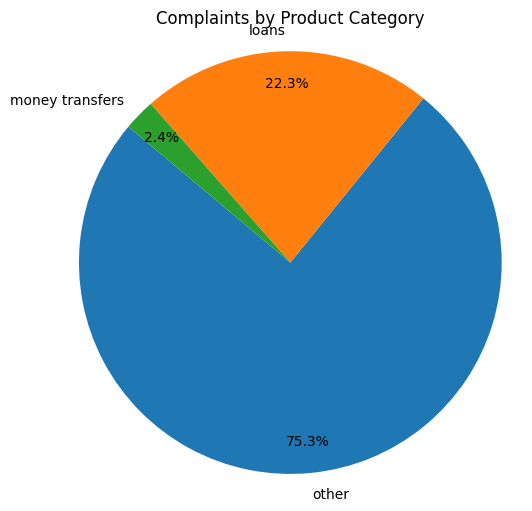

In [14]:
# calculating the counts of each product category
category_counts = complaints['product_category'].value_counts()

# a pie plot - % of each product category
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')
plt.title('Complaints by Product Category')
#plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.show()

In [15]:
# creating new table with loans and money transfers
types_of_product = ['loans', 'money transfers']
df = complaints.query('product_category in @types_of_product').copy() # .reset_index(drop = True) - let's not reset the index.
display(df.head(1))
print()
# the shape (number of rows and columns) of a new table
print(df.shape)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category
3,2023-10-11,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Need information about your loan balance or lo...,For MOHELA- I was proactive and applied for ID...,Company believes it acted appropriately as aut...,MOHELA,AZ,85042,NaN,Consent provided,Web,2023-10-11,Closed with explanation,Yes,NaN,7685487,loans



(1088120, 19)


### Checking - how many entries did we omit from our new cleaned dataset and which issues do they contain primarily

This ensures that important issues are not overlooked.

In [16]:
# primarily omitted entries from the cleaned dataset
complaints[(complaints.product_category=='other')]['issue'].value_counts().head(40)

Incorrect information on your report                                                1030979
Improper use of your report                                                          565540
Problem with a credit reporting company's investigation into an existing problem     498340
Attempts to collect debt not owed                                                    164569
Managing an account                                                                  107731
Incorrect information on credit report                                                95881
Written notification about debt                                                       74047
Problem with a company's investigation into an existing problem                       68529
Cont'd attempts collect debt not owed                                                 56989
Communication tactics                                                                 51273
Problem with a purchase shown on your statement                                 

In [17]:
# calculating missing values
df.isna().sum()

date_received                        0
product                              0
sub_product                      20445
issue                                0
sub_issue                       559068
consumer_complaint_narrative    446030
company_public_response         666941
company                              0
state                            16983
zip_code                          9556
tags                            926093
consumer_consent_provided       305078
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         3
timely_response                      0
consumer_disputed               729771
complaint_id                         0
product_category                     0
dtype: int64

## PRODUCT cleaning

In [18]:
# creating columns with month and year the complaint was received
df['month_received'] = df.date_received.dt.to_period('M')
df['year_received'] = df.date_received.dt.to_period('Y')

In [19]:
# a pivot table to analyze the number of complaints about each product across different years
products_by_year = pd.pivot_table(df, index='product', columns='year_received', values='complaint_id', aggfunc='count')
display(products_by_year)
#products_by_year.T.plot(kind='bar', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

year_received,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
product,,,,,,,,,,,,,
Bank account or service,NaN,4523.0,4810.0,5221.0,6789.0,8325.0,2676.0,NaN,NaN,NaN,NaN,NaN,NaN
Checking or savings account,NaN,NaN,NaN,NaN,NaN,NaN,1030.0,1503.0,1520.0,2078.0,2795.0,3818.0,4702.0
Consumer Loan,NaN,1986.0,3117.0,5456.0,7881.0,9590.0,3542.0,NaN,NaN,NaN,NaN,NaN,NaN
Credit card,27.0,329.0,245.0,283.0,1366.0,1956.0,595.0,NaN,NaN,NaN,NaN,NaN,1227.0
Credit card or prepaid card,NaN,NaN,NaN,NaN,NaN,NaN,1624.0,2570.0,2889.0,4435.0,4107.0,4748.0,4548.0
Credit reporting,NaN,NaN,NaN,NaN,3232.0,4896.0,1927.0,NaN,NaN,NaN,NaN,NaN,NaN
Credit reporting or other personal consumer reports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18499.0
"Credit reporting, credit repair services, or other personal consumer reports",NaN,NaN,NaN,NaN,NaN,NaN,11631.0,17171.0,21551.0,36671.0,34617.0,68041.0,72778.0
Debt collection,NaN,NaN,NaN,NaN,3086.0,4092.0,5683.0,6414.0,6502.0,7190.0,9324.0,8163.0,6794.0


We see that 2017 is a dividing year, that the database changed its structure. And changed again in 2023.

Now it's a good idea to remove all products and issues from the database that are not present in 2018-2023 data. If we keep them, we will create FAQ for obsolete issues, that might have been integrated into other issues or are no longer a thing.

### Warning - removal of 30% of dataset (obsolete products and issues)!

We could keep these rows, but they won't add anything to the analysis, other than the knowledge that 5 years ago this issue was hot. And now it's not.

Basically, we cut our dataset at 2018 as starting date and work with the new version only.




In [20]:
# filtering the table to include only data starting from 2018
df = df[df.date_received>='2018-01-01']
# the shape (number of rows and columns) of a new table
print(df.shape)

(674768, 21)


Our new dataset consists of 674768 rows.

Let's clean product names.

In [21]:
# a dictionary to map product names to new categories
product_new = {
    'Bank account or service': 'Checking or savings account',
    'Credit card' : 'Credit card or prepaid card',
    'Credit reporting': 'Credit reporting or other personal consumer reports',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit reporting or other personal consumer reports',
    'Debt or credit management': 'Debt collection',
    'Money transfers': 'Money transfer, virtual currency, or money service',
    'Virtual currency': 'Money transfer, virtual currency, or money service',
    'Other financial service': 'Payday loan, title loan, personal loan, or advance loan',
    'Payday loan': 'Payday loan, title loan, personal loan, or advance loan',
    'Payday loan, title loan, or personal loan': 'Payday loan, title loan, personal loan, or advance loan'  ,
    'Consumer Loan':   'Payday loan, title loan, personal loan, or advance loan'  ,
    }
# replacing product names with new categories
df['product'] = df['product'].replace(product_new)

year_received,2018,2019,2020,2021,2022,2023
product,,,,,,
Checking or savings account,1503.0,1520.0,2078.0,2795.0,3818.0,4702.0
Credit card or prepaid card,2570.0,2889.0,4435.0,4107.0,4748.0,5775.0
Credit reporting or other personal consumer reports,17171.0,21551.0,36671.0,34617.0,68041.0,91277.0
Debt collection,6414.0,6502.0,7190.0,9324.0,8163.0,6841.0
"Money transfer, virtual currency, or money service",5431.0,5075.0,8303.0,13858.0,13532.0,12514.0
Mortgage,24570.0,22703.0,24651.0,26527.0,23291.0,21025.0
"Payday loan, title loan, personal loan, or advance loan",4360.0,4318.0,4201.0,4352.0,5774.0,6675.0
Prepaid card,NaN,NaN,NaN,NaN,NaN,413.0
Student loan,8764.0,7203.0,4380.0,4127.0,7953.0,9338.0


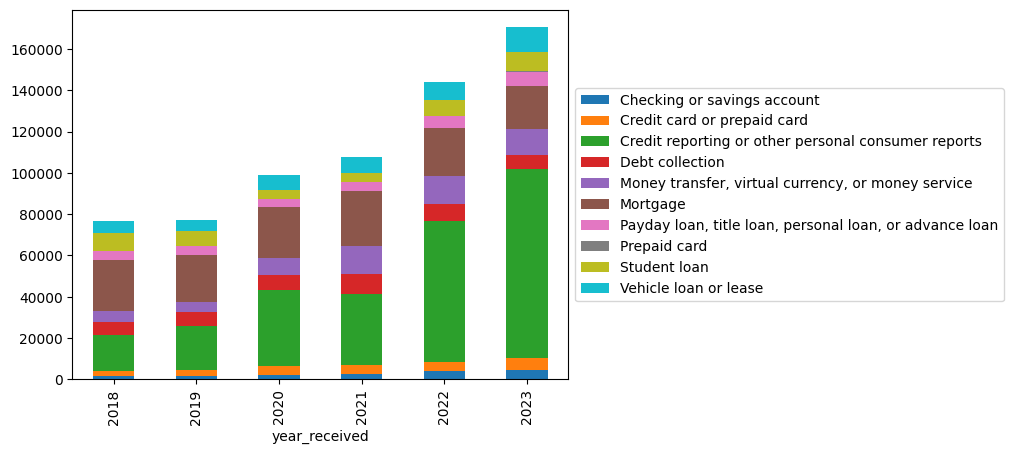

In [22]:
# pivot table to recalculate the updated distribution of complaints by product and year
products_by_year = pd.pivot_table(df, index='product', columns='year_received', values='complaint_id', aggfunc='count')
display(products_by_year)
# ploting a stacked bar chart to visualize complaints by product and year
products_by_year.T.plot(kind='bar', stacked=True).legend( loc='center left', bbox_to_anchor=(1.0, 0.5));

We can see that most complaints are related to 'Credit reporting or other personal consumer reports,' followed by 'Mortgage'.

In [23]:
# unique 'issue' values for products containing 'card'
df[df['product'].str.contains('card')]['issue'].unique()

array(['Problem with a purchase shown on your statement',
       'Problem with a purchase or transfer', 'Fees or interest',
       'Other features, terms, or problems',
       'Advertising and marketing, including promotional offers',
       'Getting a credit card', 'Problem when making payments',
       "Problem with a company's investigation into an existing problem",
       'Closing your account', 'Incorrect information on your report',
       'Trouble using your card',
       'Problem getting a card or closing an account',
       'Struggling to pay your bill', 'Improper use of your report',
       'Credit monitoring or identity theft protection services',
       'Trouble using the card',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Unexpected or other fees', 'Advertising',
       'Problem with overdraft',
       'Problem with fraud alerts or security freezes',
       'Unable to get your credit report or credit score'], dtype=obj

## SUB_PRODUCT cleaning:

First, let's propagate existing PRODUCT values to missing SUB_PRODUCT cells. It will allow us to use the whole dataset when building distributions for SUB_PRODUCTs.

In [24]:
# filling missing values in 'sub_product' with a combination of word 'PRODUCT' and value from 'product' columns
df['sub_product'] = df['sub_product'].fillna('PRODUCT '+df['product'])

In [25]:
# checking unique 'sub_product' values
df['sub_product'].sort_values().unique()

array(['Auto debt', 'CD (Certificate of Deposit)',
       'Check cashing service', 'Checking account',
       'Conventional home mortgage', 'Credit card debt',
       'Credit repair services', 'Credit reporting', 'Debt settlement',
       'Domestic (US) money transfer', 'Earned wage access',
       'FHA mortgage', 'Federal student loan debt',
       'Federal student loan servicing', 'Foreign currency exchange',
       'General-purpose credit card or charge card',
       'General-purpose prepaid card', 'Gift card',
       'Government benefit card',
       'Home equity loan or line of credit (HELOC)', 'I do not know',
       'Installment loan', 'International money transfer', 'Lease',
       'Loan', 'Manufactured home loan', 'Medical debt',
       'Mobile or digital wallet', 'Money order',
       "Money order, traveler's check or cashier's check",
       'Mortgage debt', 'Mortgage modification or foreclosure avoidance',
       'Other advances of future income',
       'Other banking prod

In [26]:
# filtering the table to find unique products where 'sub_product' contains 'Home equity loan'
df[df.sub_product.str.contains('Home equity loan')==True]['product'].unique()

array(['Mortgage'], dtype=object)

'Home equity loan' belongs to the 'Mortgage' category, so we will keep the 'Mortgage' category in our analysis.

Let's clean sub-product values.

In [27]:
# a dictionary for replacements
sub_product_new = {
    r'Auto.*': 'Auto debt',
    '\(CD\) Certificate of deposit' : 'CD (Certificate of Deposit)' ,
    r'Check cashing.*' : 'Cashing a check without an account service',
    r'Cashing a check.*': 'Cashing a check without an account service',
    'Checking or savings account': 'Checking account',
    r'Conventional.*' : 'Conventional home mortgage',
    r'Credit repair.*': 'Credit repair services',
    r'Credit reporting.*': 'Credit reporting',
    r'Credit card.*' : 'Credit card debt',
    r'Federal student loan.*': 'Federal student loan servicing',
    'General purpose card': 'General-purpose credit card or charge card',
    'Gift card': 'Gift or merchant card',
    'Government benefit payment card':  'Government benefit card',
    'ID prepaid card': 'General-purpose prepaid card',
    r'Medical.*': 'Medical debt',
    r'Mortgage.*' : 'Mortgage debt',
    r'Payday.*' : 'Payday loan, title loan, personal loan, or advance loan',
    r'Home [Ee]quity.*' :'Home equity loan or line of credit (HELOC)',
    'Other mortgage': 'Other type of mortgage' ,
    'Other bank product/service': 'Other banking product or service',
    r'Traveler.*': "Money order, traveler's check or cashier's check",
    r'Money order.*': "Money order, traveler's check or cashier's check",
    'Mobile wallet' : 'Mobile or digital wallet',
    'Non-federal student loan': 'Private student loan',
    'Private student loan debt': 'Private student loan',
     "Credit reporting company's investigations" :  "Credit reporting company's investigation",
    }

# cleaning values in the 'issues' column using the dictionary
df['sub_product'].replace(sub_product_new, inplace=True, regex=True)

In [28]:
# a pivot table to count complaints by 'sub_product' and 'year_received'
sub_products_by_year = pd.pivot_table(df, index='sub_product', columns='year_received', values='complaint_id', aggfunc='count').fillna(0)
display(sub_products_by_year.head(60))

year_received,2018,2019,2020,2021,2022,2023
sub_product,,,,,,
Auto debt,398.0,378.0,451.0,657.0,536.0,543.0
CD (Certificate of Deposit),29.0,26.0,30.0,27.0,46.0,87.0
Cashing a check without an account service,85.0,91.0,116.0,155.0,215.0,310.0
Checking account,1212.0,1270.0,1696.0,2288.0,3095.0,3722.0
Conventional home mortgage,14023.0,14040.0,15999.0,17242.0,14463.0,12247.0
Credit card debt,916.0,1068.0,1196.0,2041.0,1451.0,1280.0
Credit repair services,60.0,96.0,89.0,96.0,216.0,192.0
Credit reporting,16856.0,21240.0,36302.0,34216.0,67261.0,90486.0
Debt settlement,138.0,157.0,134.0,112.0,164.0,183.0


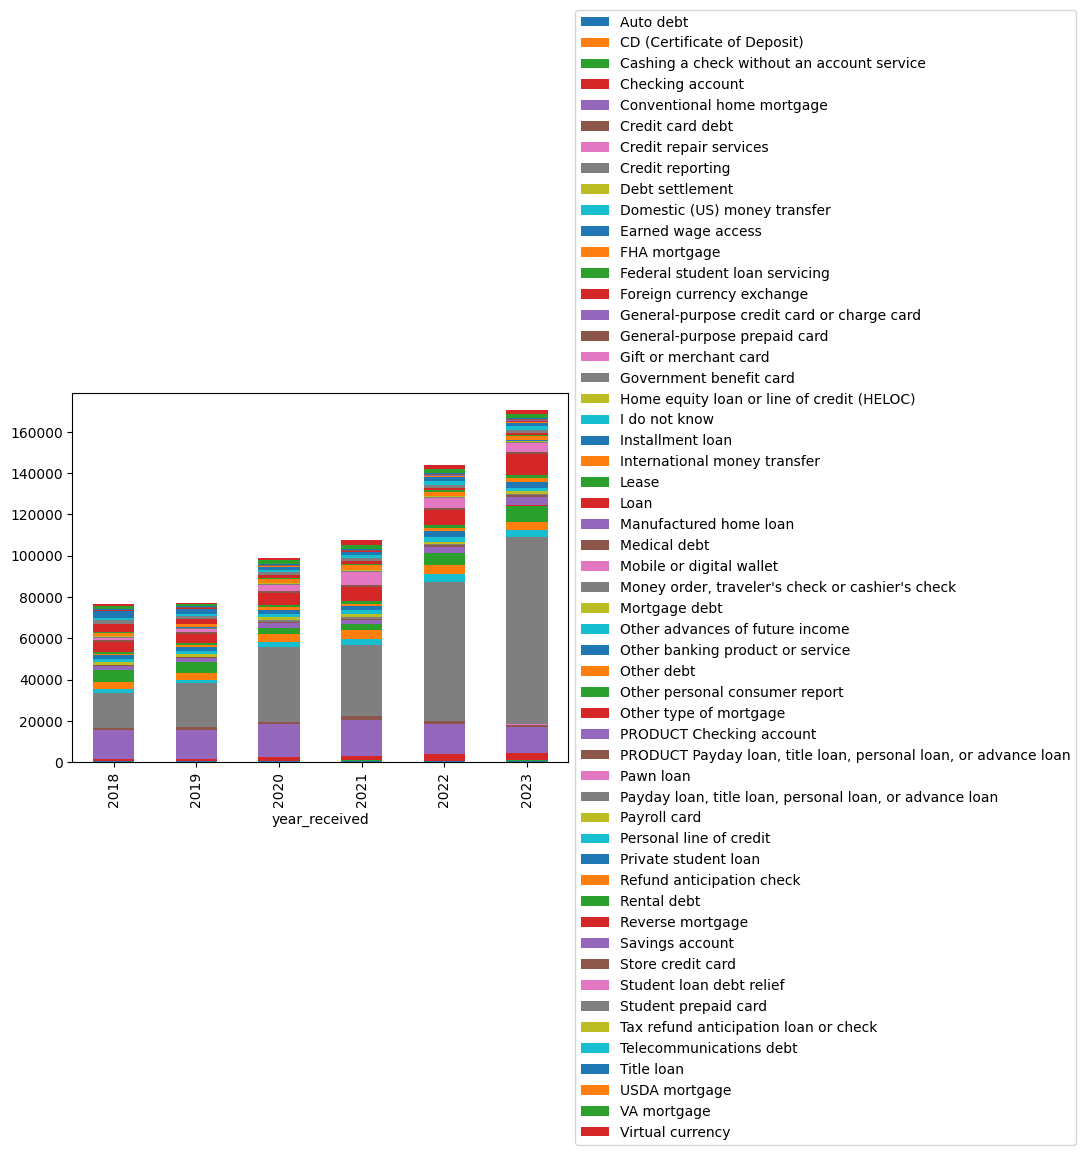

In [29]:
# plot a stacked bar chart to visualize complaints by 'sub_product' and year
sub_products_by_year.T.plot(kind='bar', stacked=True).legend( loc='center left', bbox_to_anchor=(1.0, 0.5));

Let's check - how many entries by sub_products are there in the original dataset containing keywords in the narrative and in our cleaned dataset.

We should have more entries in most categories, since we included also tagged entries with empty narratives.


In [30]:
# comparing the number of entries in 'sub_product' before and after cleaning
#prods_loan = df[df.consumer_complaint_narrative.str.contains('loan|Loan|mortgage|Mortgage|lease|Lease')==True]['sub_product'].value_counts().to_frame()
prods_loan = df['sub_product'].value_counts().to_frame()
sub_prods_loan = complaints[complaints.consumer_complaint_narrative.str.contains('loan|Loan|mortgage|Mortgage|lease|Lease')==True]['sub_product'].value_counts().to_frame()
comparing = prods_loan.join(sub_prods_loan, how='outer', lsuffix='_df', rsuffix='_complaints')
display(comparing.sort_values(by='sub_product_complaints', ascending=False).head(40))

,sub_product_df,sub_product_complaints
Credit reporting,266361.0,258465.0
Conventional home mortgage,88014.0,42803.0
Federal student loan servicing,30814.0,20329.0
FHA mortgage,22624.0,18386.0
Checking account,13283.0,15787.0
General-purpose credit card or charge card,14895.0,15461.0
Loan,39520.0,14349.0
Conventional fixed mortgage,NaN,13117.0
Other debt,11351.0,12136.0
I do not know,9846.0,11382.0


In [31]:
# checking for missing 'sub_product' values
df[df.sub_product.isna()==True].shape

(0, 21)

In [32]:
# printing unique 'issue' values for each 'sub_product'
for i in df.sub_product.unique():
    print('--------------\n',i)
    print(df[df.sub_product==i]['issue'].unique())

--------------
 Federal student loan servicing
['Dealing with your lender or servicer'
 'Incorrect information on your report' 'Struggling to repay your loan'
 'Improper use of your report'
 "Problem with a company's investigation into an existing problem"
 'Attempts to collect debt not owed'
 "Problem with a credit reporting company's investigation into an existing problem"
 'False statements or representation' 'Written notification about debt'
 'Communication tactics'
 'Took or threatened to take negative or legal action'
 'Threatened to contact someone or share information improperly'
 'Credit monitoring or identity theft protection services'
 'Unable to get your credit report or credit score'
 'Problem with fraud alerts or security freezes'
 'Problem with credit report or credit score' 'Getting a loan']
--------------
 Credit reporting
['Incorrect information on your report'
 "Problem with a company's investigation into an existing problem"
 'Improper use of your report'
 "Problem 

In [33]:
# removing rows where 'sub_product' contains 'card'. They are not relevant to analysis.
df=df[~df.sub_product.str.contains('card')]

In [34]:
# the shape of the filtered data
df.shape

(641879, 21)

### Sorting out and  cleaning ISSUES

In [35]:
# checking unique 'issue' values
df['issue'].sort_values().unique()

array(['Advertising and marketing, including promotional offers',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Attempts to collect debt not owed',
       "Can't contact lender or servicer",
       "Can't stop withdrawals from your bank account",
       "Charged fees or interest you didn't expect",
       'Charged upfront or unexpected fees', 'Closing an account',
       'Closing on a mortgage', 'Communication tactics',
       'Confusing or misleading advertising or marketing',
       'Confusing or missing disclosures', 'Credit limit changed',
       'Credit monitoring or identity theft protection services',
       'Dealing with your lender or servicer',
       "Didn't provide services promised", 'Electronic communications',
       'Excessive fees', 'False statements or representation',
       'Fraud or scam', 'Getting a line of credit', 'Getting a loan',
       'Getting a loan or lease', 'Getting the loan',
       'Identity theft protection or other mon

In [36]:
# the top 50 most common 'issue' values
df['issue'].value_counts().head(50)

Incorrect information on your report                                                153067
Problem with a credit reporting company's investigation into an existing problem     83300
Trouble during payment process                                                       68290
Struggling to pay mortgage                                                           37355
Improper use of your report                                                          36553
Dealing with your lender or servicer                                                 29324
Fraud or scam                                                                        20671
Applying for a mortgage or refinancing an existing mortgage                          19643
Attempts to collect debt not owed                                                    19014
Managing the loan or lease                                                           15401
Closing on a mortgage                                                                12208

In [37]:
# cleaning issues
dicta = {" I " : ' ',
         " my " : ' ',
         " your ": ' ',
         " the " : ' ',
         " a ": ' ',
         " an ": ' ',
         " you ": ' ',
         ", or ": '/',
         " or ": '/',
         " problem": ' issues'
        }
df['issue'] = df['issue'].replace(dicta, regex=True)
print(df['issue'].sort_values().unique())

['Advertising and marketing, including promotional offers'
 'Applying for mortgage/refinancing existing mortgage'
 'Attempts to collect debt not owed' "Can't contact lender/servicer"
 "Can't stop withdrawals from bank account"
 "Charged fees/interest didn't expect" 'Charged upfront/unexpected fees'
 'Closing account' 'Closing on mortgage' 'Communication tactics'
 'Confusing/misleading advertising/marketing'
 'Confusing/missing disclosures' 'Credit limit changed'
 'Credit monitoring/identity theft protection services'
 'Dealing with lender/servicer' "Didn't provide services promised"
 'Electronic communications' 'Excessive fees'
 'False statements/representation' 'Fraud/scam' 'Getting line of credit'
 'Getting loan' 'Getting loan/lease'
 'Identity theft protection/other monitoring services'
 'Improper use of report' 'Incorrect exchange rate'
 'Incorrect information on report' 'Issue where lender is school'
 'Issue with income share agreement' 'Issues with repayment'
 "Loan payment wasn'

In [38]:
# a pivot table to count issues by year
issues_by_year = pd.pivot_table(df, index='issue', columns='year_received', values='complaint_id', aggfunc='count')
display(issues_by_year.head(60))

year_received,2018,2019,2020,2021,2022,2023
issue,,,,,,
"Advertising and marketing, including promotional offers",NaN,NaN,NaN,NaN,NaN,1.0
Applying for mortgage/refinancing existing mortgage,2152.0,2422.0,4303.0,5021.0,3358.0,2387.0
Attempts to collect debt not owed,2525.0,2883.0,3154.0,4028.0,3558.0,2866.0
Can't contact lender/servicer,103.0,115.0,147.0,107.0,110.0,88.0
Can't stop withdrawals from bank account,87.0,96.0,52.0,47.0,75.0,94.0
Charged fees/interest didn't expect,1241.0,1076.0,974.0,903.0,1205.0,1556.0
Charged upfront/unexpected fees,NaN,NaN,NaN,NaN,NaN,7.0
Closing account,187.0,203.0,395.0,509.0,593.0,765.0
Closing on mortgage,1640.0,1710.0,2476.0,2821.0,2045.0,1516.0


In [39]:
# more issues cleaning
# a dictionary for replacements
issue_new = {
    r'.*[Aa]dvert.*': 'Advertising, marketing/disclosures',
    r'.*[Ff]ees.*': "Unexpected/excessive fees",
    r'.*epossess.*': 'Vehicle repossessed/sold vehicle',
    r'.*[Ii]dentity.*': 'Identity theft / Fraud / Scam / Embezzlement',
    r'.*Fraud.*' : 'Identity theft / Fraud / Scam / Embezzlement',
    r'.*not owed.*' : 'Attempts to collect debt not owed',
    r"Can't contact lender.*" : "Can't contact lender/servicer",
    r'Getting loan.*' : 'Getting loan/lease',
    r'Incorrect.*info.*': 'Incorrect/missing disclosures/info',
    'Closing account': 'Problem getting card/closing account',
    'Closing/Cancelling account': 'Problem getting card/closing account',
    'Customer service / Customer relations': 'Customer service/Customer relations',
    'Improper use of report': 'Improper use of credit report',
    "Problem with credit reporting company's investigation into existing issues" : "Credit reporting company investigation",
    r"Problem with company.*": "Credit reporting company investigation",
    r"Credit reporting company.*": "Credit reporting company investigation",
    'Lender damaged/destroyed vehicle' : 'Vehicle was damaged/destroyed vehicle',
    'Lender damaged/destroyed property' : 'Property was damaged/destroyed property',
    'Lender sold property' : 'Property was sold',
    "Can't stop charges to bank account" : "Can't stop withdrawals from bank account",
    'Struggling to repay loan' : "Can't repay loan",
    'Struggling to pay loan' : "Can't repay loan",
    'Issues with repayment' : "Can't repay loan",
    'Repaying loan': "Can't repay loan",
    'Trouble during payment process': 'Transaction issue',
    'Other transaction issues':'Transaction issue',
    'Problem when making payments':'Transaction issue',
    'Making/receiving payments, sending money':'Transaction issue',
    'Charged bank acct wrong day/amt' : 'Money was taken from bank account on wrong day/for wrong amount',
    'Problem with cash advance' : 'Cash advance',
    'Unauthorized transactions/trans. issues': 'Unauthorized transactions/other transaction issues',
}

# cleaning values in the 'issues' column using the dictionary
df['issue'] = df['issue'].replace(issue_new, regex=True)
df['issue'].sort_values().unique()

array(['Advertising, marketing/disclosures',
       'Applying for mortgage/refinancing existing mortgage',
       'Attempts to collect debt not owed',
       "Can't contact lender/servicer", "Can't repay loan",
       "Can't stop withdrawals from bank account", 'Cash advance',
       'Closing on mortgage', 'Communication tactics',
       'Confusing/missing disclosures', 'Credit limit changed',
       'Credit reporting company investigation',
       'Dealing with lender/servicer', "Didn't provide services promised",
       'Electronic communications', 'False statements/representation',
       'Getting line of credit', 'Getting loan/lease',
       'Identity theft / Fraud / Scam / Embezzlement',
       'Improper use of credit report', 'Incorrect exchange rate',
       'Incorrect/missing disclosures/info',
       'Issue where lender is school',
       'Issue with income share agreement',
       "Loan payment wasn't credited to account", 'Lost/stolen check',
       'Lost/stolen money order'

In [40]:
# a pivot table to count issues by year with cleaned issues
issues_by_year = pd.pivot_table(df, index='issue', columns='year_received', values='complaint_id', aggfunc='count')
display(issues_by_year.sort_values(by='2023', ascending=False).head(60))

year_received,2018,2019,2020,2021,2022,2023
issue,,,,,,
Incorrect/missing disclosures/info,11775.0,13417.0,25818.0,20201.0,35845.0,46011.0
Credit reporting company investigation,5072.0,7267.0,10978.0,12110.0,23705.0,30783.0
Improper use of credit report,2039.0,1906.0,1789.0,4826.0,10194.0,15799.0
Transaction issue,13053.0,12751.0,13714.0,14812.0,14106.0,13462.0
Dealing with lender/servicer,5727.0,4845.0,2868.0,2599.0,6072.0,7213.0
Struggling to pay mortgage,8653.0,6601.0,5204.0,5537.0,5645.0,5715.0
Identity theft / Fraud / Scam / Embezzlement,1773.0,2268.0,2747.0,4239.0,6528.0,5550.0
Managing loan/lease,2086.0,1893.0,2327.0,2346.0,2652.0,4097.0
Can't repay loan,4081.0,3436.0,2696.0,2208.0,3040.0,3996.0


A function is defined to group issues into higher-level categories based on keywords in the issue value. This categorization helps understand the general areas of concern.

In [41]:
# function to categorize issues
def categorize_issue(issue):
    issue_lower = issue.lower()
    if any(keyword in issue_lower for keyword in ['account terms', 'wallet account', 'deposits']):
        return 'Account Management Issues'

    elif any(keyword in issue_lower for keyword in ['charged', 'overdraft', 'cash', 'exchange', 'fee', 'settlement']):
        return 'Fees and Charges Issues'

    elif any(keyword in issue_lower for keyword in ['loan', 'dealing with lender', 'share agreement', 'repay',
                                                     'school', 'cash advance']):
        return 'Loan or Lease Related Issues'

    elif 'mortgage' in issue_lower:
        return 'Mortgage Related Issues'

    elif any(keyword in issue_lower for keyword in ['fraud', 'theft', 'stolen']):
        return 'Fraud'

    elif any(keyword in issue_lower for keyword in [ 'report', 'disclosures/info']):
        return 'Privacy issues'

    elif any(keyword in issue_lower for keyword in ['payment', 'transaction', 'adding', 'bank account', 'available', 'funds', 'transfer']):
        return 'Payment and Transaction Issues'

    elif any(keyword in issue_lower for keyword in ['service', 'confusing', 'investigation', 'servicer']):
        return 'Service and Communication Issues'

    elif any(keyword in issue_lower for keyword in ['property', 'vehicle', 'damaged', 'sold', 'repossess']):
        return 'Property and Asset Management'

    elif any(keyword in issue_lower for keyword in [ 'credit', 'card']):
        return 'Credit/Debit Card Issues'

    else:
        return 'Other Issues'

# applying the categorization function
df['issue_category'] = df['issue'].apply(categorize_issue)
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category,month_received,year_received,issue_category
3,2023-10-11,Student loan,Federal student loan servicing,Dealing with lender/servicer,Need information about your loan balance or lo...,For MOHELA- I was proactive and applied for ID...,Company believes it acted appropriately as aut...,MOHELA,AZ,85042,...,Web,2023-10-11,Closed with explanation,Yes,NaN,7685487,loans,2023-10,2023,Loan or Lease Related Issues
4,2023-10-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect/missing disclosures/info,Information belongs to someone else,Your recent claims have cast a significant sha...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,928XX,...,Web,2023-10-09,Closed with explanation,Yes,NaN,7662525,loans,2023-10,2023,Privacy issues
8,2023-11-27,Debt collection,I do not know,Written notification about debt,Didn't receive enough information to verify debt,I have recently noticed that there have been l...,Company has responded to the consumer and the ...,"LoanCare, LLC",CA,94544,...,Web,2023-11-27,Closed with explanation,Yes,NaN,7905861,loans,2023-11,2023,Other Issues
10,2023-10-11,Student loan,Federal student loan servicing,Dealing with lender/servicer,Received bad information about your loan,Description of Problem I have outstanding stud...,Company believes it acted appropriately as aut...,MOHELA,DC,20010,...,Web,2023-10-11,Closed with explanation,Yes,NaN,7683122,loans,2023-10,2023,Loan or Lease Related Issues
14,2023-11-26,Mortgage,Conventional home mortgage,Transaction issue,Trying to communicate with the company to fix ...,My mortgage rate was adjusted upwards and I di...,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",PA,189XX,...,Web,2023-11-26,Closed with explanation,Yes,NaN,7905001,loans,2023-11,2023,Payment and Transaction Issues


## Sub_issue cleaning:

In [42]:
# a pivot table to count sub-issues by year
sub_issues_by_year = pd.pivot_table(df, index='sub_issue', columns='year_received', values='complaint_id', aggfunc='count')
display(sub_issues_by_year.head(60)) # .sort_values(by='2023', ascending=False)

year_received,2018,2019,2020,2021,2022,2023
sub_issue,,,,,,
Account information incorrect,2609.0,2536.0,3467.0,4037.0,4428.0,5266.0
Account opened as a result of fraud,34.0,30.0,43.0,90.0,111.0,100.0
Account opened without my consent or knowledge,NaN,NaN,NaN,NaN,NaN,22.0
Account reinstatement or redemption after repossession,NaN,NaN,NaN,NaN,NaN,82.0
Account status incorrect,3767.0,2899.0,4793.0,5027.0,4873.0,5993.0
"An existing modification, forbearance plan, short sale, or other loss mitigation relief",NaN,NaN,NaN,NaN,NaN,193.0
Application denials,NaN,NaN,NaN,NaN,NaN,150.0
"Applying for or obtaining a modification, forbearance plan, short sale, or deed-in-lieu",NaN,NaN,NaN,NaN,NaN,264.0
Attempted to collect wrong amount,569.0,509.0,605.0,585.0,555.0,523.0


In [43]:
# cleaning sub-issues
dicta = {"\bI " : ' ',
         " my " : ' ',
         " your ": ' ',
         " the " : ' ',
         " a ": ' ',
         " an ": ' ',
         " you ": ' ',
         ", or ": '/',
         " or ": '/',
         " problem": ' issues'
        }
df['sub_issue'] = df['sub_issue'].replace(dicta, regex=True)
print(df['sub_issue'].sort_values().unique())

['Account information incorrect' 'Account opened as result of fraud'
 'Account opened without consent/knowledge'
 'Account reinstatement/redemption after repossession'
 'Account status incorrect'
 'An existing modification, forbearance plan, short sale/other loss mitigation relief'
 'Application denials'
 'Applying for/obtaining modification, forbearance plan, short sale/deed-in-lieu'
 'Attempted to collect wrong amount' 'Banking errors' 'Bankruptcy'
 'Billing dispute for services' 'Billing issues'
 'Billing/statement issues' 'Bounced checks/returned payments'
 'Called before 8am/after 9pm' "Can't close account"
 "Can't get other flexible options for repaying loan"
 "Can't stop withdrawals from account"
 "Can't temporarily delay making payments"
 "Can't use card to make purchases"
 'Cannot graduate, receive diploma/get transcript due to money owed'
 'Cashing check' 'Changes in loan terms during application process'
 'Changes in loan terms during/after closing'
 'Changes in terms mid-de

In [44]:
# Let's look at sub_issues that were not present in any 2018+ entries:
#for i in pd.Index(df.sub_issue.unique()).difference( pd.Index(df[(df.year_received>='2018-01-01')].sub_issue.unique()) ):
#  print('\n----------------', i, ':')
#  print(df[df.sub_issue==i]['issue'].unique())


In [45]:
# the number of unique sub-issues for each issue
print(df.groupby('issue')['sub_issue'].nunique().sort_values().head(36))
print(df.groupby('issue')['sub_issue'].nunique().sort_values().tail(10))

issue
Money was taken from bank account on wrong day/for wrong amount    0
Lost/stolen money order                                            0
Managing, opening/closing mobile wallet account                    0
Money was not available when promised                              0
Other service issues                                               0
Overdraft, savings/rewards features                                0
Problem adding money                                               0
Problem with additional add-on products/services                   0
Problem with customer service                                      0
Problem with fraud alerts/security freezes                         0
Lost/stolen check                                                  0
Problem with payoff process at end of loan                         0
Property was damaged/destroyed property                            0
Property was sold                                                  0
Received loan didn't apply f

Zeroes - those `issue`s that have no `sub-issue`s. In their case, `sub_issue` field is empty and can be filled with `issue` value.
Not zeroes - the number of `sub_issue`s for this `issue`.

In [46]:
# filling missing values in 'sub_issue' with word 'ISSUE' and 'issue' value
df.sub_issue.fillna('ISSUE ' + df.issue, inplace=True)

In [47]:
#  a pivot table to show the number of sub-issues by year
sub_issues_by_year = pd.pivot_table(df, index='sub_issue', columns='year_received', values='complaint_id', aggfunc='count')
display(sub_issues_by_year.sort_values(by='2023', ascending=False).head(60))

year_received,2018,2019,2020,2021,2022,2023
sub_issue,,,,,,
Information belongs to someone else,3356.0,5900.0,15388.0,8981.0,23656.0,30413.0
Their investigation did not fix error on report,3118.0,5397.0,5890.0,5564.0,16889.0,24016.0
Reporting company used report improperly,516.0,513.0,619.0,3054.0,6769.0,10546.0
ISSUE Transaction issue,13053.0,12751.0,13714.0,14812.0,14106.0,10451.0
Account status incorrect,3767.0,2899.0,4793.0,5027.0,4873.0,5993.0
Account information incorrect,2609.0,2536.0,3467.0,4037.0,4428.0,5266.0
Credit inquiries on report that don't recognize,1465.0,1327.0,1126.0,1713.0,3257.0,4991.0
ISSUE Identity theft / Fraud / Scam / Embezzlement,1499.0,1948.0,2428.0,3830.0,5994.0,4972.0
ISSUE Struggling to pay mortgage,8653.0,6601.0,5204.0,5537.0,5645.0,4431.0


In [48]:
# the unique values in the 'sub_issue' column after filling missing values
print(df['sub_issue'].sort_values().unique())

['Account information incorrect' 'Account opened as result of fraud'
 'Account opened without consent/knowledge'
 'Account reinstatement/redemption after repossession'
 'Account status incorrect'
 'An existing modification, forbearance plan, short sale/other loss mitigation relief'
 'Application denials'
 'Applying for/obtaining modification, forbearance plan, short sale/deed-in-lieu'
 'Attempted to collect wrong amount' 'Banking errors' 'Bankruptcy'
 'Billing dispute for services' 'Billing issues'
 'Billing/statement issues' 'Bounced checks/returned payments'
 'Called before 8am/after 9pm' "Can't close account"
 "Can't get other flexible options for repaying loan"
 "Can't stop withdrawals from account"
 "Can't temporarily delay making payments"
 "Can't use card to make purchases"
 'Cannot graduate, receive diploma/get transcript due to money owed'
 'Cashing check' 'Changes in loan terms during application process'
 'Changes in loan terms during/after closing'
 'Changes in terms mid-de

In [49]:
# cleaning sub-issues
# a dictionary for replacements
sub_issue_new = {
    'Application denials' : 'Application denied',
    'Billing issues' : 'Billing/statement issues',
    'Called before 8am/after 9pm' : 'Contacted before 8am/after 9pm',
    'Confusing/misleading advertising' : 'Confusing/misleading advertising/marketing',
    'Trouble with how payments are handled' : 'Trouble with how payments are being handled',
    'Qualify for better loan than offered' : 'Qualified for better loan than one offered',
    'Add-on products and services' : 'ISSUE Problem with additional add-on products/services',
    'Problem with additional add-on products/services purchased with loan' : 'Problem with additional products/services purchased with loan',
    'You told them to stop contacting you, but they keep trying' : 'Contacted after asked them to stop',
    'Confusing/misleading advertising' : 'Confusing/misleading advertising/marketing',
    'High-pressure sales tactics' : 'High pressure sales tactics/recruiting',
    'Overcharged for purchase/transfer did make with card' :  'Charged for purchase/transfer did not make with card',
    'Card was charged for something did not purchase with card' : 'Charged for purchase/transfer did not make with card',
    'Problem with fees charged' :  'Fees charged',
    'Fee issues' : 'Problem with fees/penalties',
    'Problem with fees' : 'Problem with fees/penalties',
    'Delay in processing application' : 'Delays in application process',
    'Deposits and withdrawals' : 'Deposits/withdrawals',
    'Information is missing that should be on report' : 'Information that should be on report is missing',
    'Problem with cash advances' : 'ISSUE Cash advance',
    'Payment process': 'Problem during payment process',
    'Transaction was not authorized' : 'ISSUE Unauthorized transactions/other transaction issues',
     'Problem with fraud alerts/security freezes' : 'ISSUE Problem with fraud alerts/security freezes',
      'Problem with interest rate' : 'Interest rate',
      'Problem with customer service' : 'ISSUE Problem with customer service',
}
# cleaning values in the 'issues' column using the dictionary
df['sub_issue'] = df['sub_issue'].replace(sub_issue_new)
df['sub_issue'].sort_values().unique()

array(['Account information incorrect',
       'Account opened as result of fraud',
       'Account opened without consent/knowledge',
       'Account reinstatement/redemption after repossession',
       'Account status incorrect',
       'An existing modification, forbearance plan, short sale/other loss mitigation relief',
       'Application denied',
       'Applying for/obtaining modification, forbearance plan, short sale/deed-in-lieu',
       'Attempted to collect wrong amount', 'Banking errors',
       'Bankruptcy', 'Billing dispute for services',
       'Billing/statement issues', 'Bounced checks/returned payments',
       "Can't close account",
       "Can't get other flexible options for repaying loan",
       "Can't stop withdrawals from account",
       "Can't temporarily delay making payments",
       "Can't use card to make purchases",
       'Cannot graduate, receive diploma/get transcript due to money owed',
       'Cashing check',
       'Changes in loan terms during app

In [50]:
#  a pivot table to show the number of sub-issues by year with cleaned sub-issues
sub_issues_by_year_1 = pd.pivot_table(df, index='sub_issue', columns='year_received', values='complaint_id', aggfunc='count')
display(sub_issues_by_year_1.sort_values(by='2023', ascending=False).head(60))

year_received,2018,2019,2020,2021,2022,2023
sub_issue,,,,,,
Information belongs to someone else,3356.0,5900.0,15388.0,8981.0,23656.0,30413.0
Their investigation did not fix error on report,3118.0,5397.0,5890.0,5564.0,16889.0,24016.0
Reporting company used report improperly,516.0,513.0,619.0,3054.0,6769.0,10546.0
ISSUE Transaction issue,13053.0,12751.0,13714.0,14812.0,14106.0,10451.0
Account status incorrect,3767.0,2899.0,4793.0,5027.0,4873.0,5993.0
Account information incorrect,2609.0,2536.0,3467.0,4037.0,4428.0,5266.0
Credit inquiries on report that don't recognize,1465.0,1327.0,1126.0,1713.0,3257.0,4991.0
ISSUE Identity theft / Fraud / Scam / Embezzlement,1499.0,1948.0,2428.0,3830.0,5994.0,4972.0
ISSUE Struggling to pay mortgage,8653.0,6601.0,5204.0,5537.0,5645.0,4431.0


By trimming the data to 2018 onwards and updating product, sub-product, issue and sub-issue categories, the dataset now more accurately reflects current consumer complaints, which is essential for creating relevant FAQs and strategies.

In [51]:
# sub-issues related to 'identity theft' in consumer narratives
df[df.consumer_complaint_narrative.str.contains('dentity theft')==True]['sub_issue'].value_counts().head(20)

Information belongs to someone else                                           35247
Their investigation did not fix error on report                                3090
Debt was result of identity theft                                              2737
Reporting company used report improperly                                       2685
Credit inquiries on report that don't recognize                                2602
Investigation took more than 30 days                                           1117
Debt is not yours                                                               853
Account information incorrect                                                   599
Was not notified of investigation status/results                                501
Other issues getting report/credit score                                        430
Personal information incorrect                                                  358
Account status incorrect                                                    

This cell demonstrates the number of cases for each `sub_issue`, when consumer narrative contains the words 'identity theft'.
'Identity theft' here is the root of the problem. Because of the theft (which might have been years ago) a consumer is facing some issue now: either a loan or a card issued on their name, or inability of the company to fix their records (or credit report), or someone tries to collect the debt of which the consumer has no knowledge.
Notice that the number of cases tagged with main ISSUE (as identity theft) is only 243, while over 35000 are about "info belonging to someone else".

In [52]:
# statistics of new table
df.describe(include='all', datetime_is_numeric=True)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category,month_received,year_received,issue_category
count,641879,641879,641879,641879,641879,489436,306188,641879,629300,635433,...,641879,641879,641876,641879,0,6.418790e+05,641879,641879,641879,641879
unique,NaN,8,46,64,199,416887,10,4733,62,18464,...,7,NaN,5,2,0,NaN,2,72,6,11
top,NaN,Credit reporting or other personal consumer re...,Credit reporting,Incorrect/missing disclosures/info,Information belongs to someone else,I'm really not sure what happened. I have mail...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,XXXXX,...,Web,NaN,Closed with explanation,Yes,NaN,NaN,loans,2023-08,2023,Privacy issues
freq,NaN,269328,266361,153067,87694,2117,260043,80439,77365,34294,...,582248,NaN,516669,632232,NaN,NaN,583166,17672,163001,283209
mean,2021-06-29 07:33:35.207851008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-06-30 18:06:34.358438400,NaN,NaN,NaN,5.006434e+06,NaN,NaN,NaN,NaN
min,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,2.768361e+06,NaN,NaN,NaN,NaN
25%,2020-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-03-07 00:00:00,NaN,NaN,NaN,3.557326e+06,NaN,NaN,NaN,NaN
50%,2021-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-10-20 00:00:00,NaN,NaN,NaN,4.822417e+06,NaN,NaN,NaN,NaN
75%,2023-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2023-01-07 00:00:00,NaN,NaN,NaN,6.405708e+06,NaN,NaN,NaN,NaN
max,2023-12-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2023-12-13 00:00:00,NaN,NaN,NaN,7.995173e+06,NaN,NaN,NaN,NaN


In [53]:
# Are sub_issues pertaining to single issue only?
df.groupby(by='sub_issue')['issue'].nunique().sort_values(ascending=False).head(20)

sub_issue
Contacted after asked them to stop                               3
Interest rate                                                    3
Problem with additional products/services purchased with loan    2
Fees charged                                                     2
Lender trying to repossess/disable vehicle                       2
Contacted before 8am/after 9pm                                   2
Loan sold/transferred to another company                         2
Confusing/misleading advertising/marketing                       2
Billing/statement issues                                         2
Loan balance remaining after vehicle is repossessed and sold     2
Used obscene, profane/other abusive language                     2
ISSUE Problem with customer service                              2
ISSUE Unauthorized transactions/other transaction issues         2
ISSUE Problem with fraud alerts/security freezes                 2
Paying off loan                                     

In [54]:
# Are sub_products pertaining to single product only?
df.groupby(by='sub_product')['product'].nunique().sort_values(ascending=False).head(5)

sub_product
Conventional home mortgage        2
Credit repair services            2
Title loan                        2
Debt settlement                   2
Federal student loan servicing    2
Name: product, dtype: int64

In [55]:
# checking the unique values of 'submitted_via' column
df.submitted_via.value_counts()

Web             582248
Phone            26944
Referral         25002
Postal mail       6063
Fax               1259
Web Referral       351
Email               12
Name: submitted_via, dtype: int64

In [56]:
# checking the unique values of 'company_response_to_consumer' column
df.company_response_to_consumer.value_counts()

Closed with explanation            516669
Closed with non-monetary relief    102210
Closed with monetary relief         17345
In progress                          3165
Untimely response                    2487
Name: company_response_to_consumer, dtype: int64

In [57]:
# checking the unique values of 'timely_response' column
df.timely_response.value_counts()

Yes    632232
No       9647
Name: timely_response, dtype: int64

In [58]:
# checking the unique values of 'consumer_disputed' column
df.consumer_disputed.value_counts()

Series([], Name: consumer_disputed, dtype: int64)

In [59]:
# printing the first 8 consumer complaint narratives containing the word 'information'
for i in range(0,8):
  print(df[df.sub_issue.str.contains('information')==True]['consumer_complaint_narrative'].iloc[i],"\n-------------------")

For MOHELA- I was proactive and applied for IDR before the start of repayment in XXXX ( XXXX XXXX? ), and also resubmitted when I was told that they couldn't accept the new IDR because I was not due, when I was, and the old plan expired in XXXX of XXXX. I reapplied for IDR in XXXX and told that it would be processed by the late-middle of XXXX, XXXX, but then received notification ( on XXXX ) that it would be up to 90 days for the IDR to be processed. I am also in the PSLF repayment, and was told twice ( once in XXXX and once in XXXX ) that they were going to count the days in the future, but then when I called to find out why I was put on a LEVEL plan, they said that the PSLF certification form was put in denied status. At that point, the service rep put in back as active, and helped me to resubmit an IDR request at that time. I got a bunch of notifications that I was still in the LEVEL plan and when I called back, they said yes, I was in the LEVEL plan, and that I needed to make a pay

In [60]:
# the count of rows where 'sub_issue' contains 'information' grouped by various columns
display(df[df.sub_issue.str.contains('information')==True][['product','sub_product','issue','sub_issue']].value_counts())
df[df.sub_issue.str.contains('information')==True].shape

product                                                  sub_product                     issue                                    sub_issue                                                                 
Credit reporting or other personal consumer reports      Credit reporting                Incorrect/missing disclosures/info       Account information incorrect                                                 18364
Student loan                                             Federal student loan servicing  Dealing with lender/servicer             Received bad information about loan                                            8248
Credit reporting or other personal consumer reports      Credit reporting                Incorrect/missing disclosures/info       Personal information incorrect                                                 5384
                                                                                                                                  Old information reappea

(54551, 22)

In [61]:
# the most common categories of issues in the complaints
df.issue_category.value_counts().head(40)

Privacy issues                      283209
Payment and Transaction Issues       95851
Loan or Lease Related Issues         87412
Mortgage Related Issues              69206
Other Issues                         50000
Fraud                                26065
Fees and Charges Issues               9604
Account Management Issues             7703
Service and Communication Issues      6994
Credit/Debit Card Issues              4708
Property and Asset Management         1127
Name: issue_category, dtype: int64

2023-08    15330
2023-06    14505
2023-05    14035
2023-01    13925
2023-09    13736
           ...  
2018-12     3712
2019-01     3653
2018-09     3401
2023-11     1610
2023-12       77
Freq: M, Name: date_received, Length: 72, dtype: int64

<Axes: >

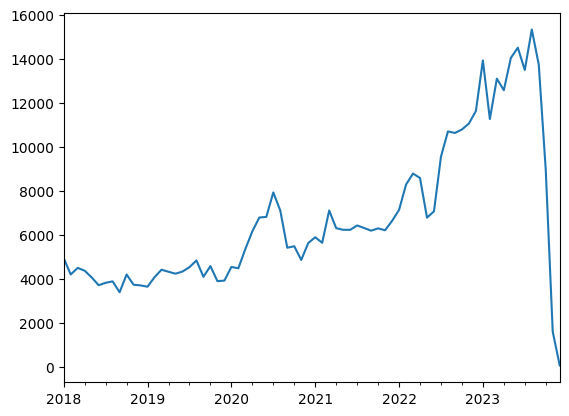

In [62]:
# the amount of non-empty consumer_complaint_narrative by month
display(df[df.consumer_complaint_narrative.notna()==True].date_received.dt.to_period('M').value_counts())
df[df.consumer_complaint_narrative.notna()==True].date_received.dt.to_period('M').value_counts().sort_index().plot()

In [63]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category,month_received,year_received,issue_category
3,2023-10-11,Student loan,Federal student loan servicing,Dealing with lender/servicer,Need information about loan balance/loan terms,For MOHELA- I was proactive and applied for ID...,Company believes it acted appropriately as aut...,MOHELA,AZ,85042,...,Web,2023-10-11,Closed with explanation,Yes,NaN,7685487,loans,2023-10,2023,Loan or Lease Related Issues
4,2023-10-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect/missing disclosures/info,Information belongs to someone else,Your recent claims have cast a significant sha...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,928XX,...,Web,2023-10-09,Closed with explanation,Yes,NaN,7662525,loans,2023-10,2023,Privacy issues
8,2023-11-27,Debt collection,I do not know,Written notification about debt,Didn't receive enough information to verify debt,I have recently noticed that there have been l...,Company has responded to the consumer and the ...,"LoanCare, LLC",CA,94544,...,Web,2023-11-27,Closed with explanation,Yes,NaN,7905861,loans,2023-11,2023,Other Issues
10,2023-10-11,Student loan,Federal student loan servicing,Dealing with lender/servicer,Received bad information about loan,Description of Problem I have outstanding stud...,Company believes it acted appropriately as aut...,MOHELA,DC,20010,...,Web,2023-10-11,Closed with explanation,Yes,NaN,7683122,loans,2023-10,2023,Loan or Lease Related Issues
14,2023-11-26,Mortgage,Conventional home mortgage,Transaction issue,Trying to communicate with company to fix issu...,My mortgage rate was adjusted upwards and I di...,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",PA,189XX,...,Web,2023-11-26,Closed with explanation,Yes,NaN,7905001,loans,2023-11,2023,Payment and Transaction Issues


In [64]:
# printing unique issues for each issue category
for i in df.issue_category.unique():
    print('--------------\n',i)
    print(df[df.issue_category==i]['issue'].unique())

--------------
 Loan or Lease Related Issues
['Dealing with lender/servicer' "Can't repay loan" 'Managing loan/lease'
 'Problems at end of loan/lease' 'Getting loan/lease'
 'Problem with payoff process at end of loan'
 "Loan payment wasn't credited to account"
 "Was approved for loan, but didn't receive money"
 "Received loan didn't apply for" 'Issue with income share agreement'
 'Issue where lender is school']
--------------
 Privacy issues
['Incorrect/missing disclosures/info'
 'Credit reporting company investigation' 'Improper use of credit report'
 'Unable to get credit report/credit score'
 'Problem with credit report/credit score']
--------------
 Other Issues
['Written notification about debt' 'Attempts to collect debt not owed'
 'Managing account' 'False statements/representation'
 'Problem with lender/other company charging account'
 'Took/threatened to take negative/legal action'
 'Threatened to contact someone/share information improperly'
 'Opening account' 'Communication t

In [65]:
# printing unique issues for each product
for i in df['product'].unique():
    print('--------------\n', i)
    print(df[df['product'] == i]['issue'].unique())

--------------
 Student loan
['Dealing with lender/servicer' "Can't repay loan" 'Getting loan/lease'
 'Incorrect/missing disclosures/info' 'Improper use of credit report'
 'Credit reporting company investigation'
 'Issue with income share agreement' 'Issue where lender is school'
 'Identity theft / Fraud / Scam / Embezzlement'
 'Unable to get credit report/credit score'
 'Problem with fraud alerts/security freezes'
 'Problem with credit report/credit score']
--------------
 Credit reporting or other personal consumer reports
['Incorrect/missing disclosures/info'
 'Credit reporting company investigation' 'Improper use of credit report'
 'Identity theft / Fraud / Scam / Embezzlement'
 'Problem with fraud alerts/security freezes'
 'Unable to get credit report/credit score'
 'Problem with customer service' 'Unexpected/excessive fees'
 'Advertising, marketing/disclosures' 'Confusing/missing disclosures'
 'Struggling to pay mortgage' 'Getting loan/lease'
 'Problem with payoff process at end 

In [66]:
# printing unique sub-issues for each product
for i in df['product'].unique():
    print('--------------\n', i)
    print(df[df['product'] == i]['sub_issue'].unique())

--------------
 Student loan
['Need information about loan balance/loan terms'
 'Received bad information about loan'
 'Trouble with how payments are being handled'
 "Can't temporarily delay making payments" 'Keep getting calls about loan'
 'Confusing/misleading advertising/marketing'
 'Account information incorrect' 'Co-signer'
 'ISSUE Problem with customer service' 'Problem with payment plan'
 "Don't agree with fees charged" 'Problem lowering monthly payments'
 'Loan opened without consent/knowledge'
 'Problem with forgiveness, cancellation/discharge'
 "Credit inquiries on report that don't recognize" 'Denied loan'
 'Information belongs to someone else'
 "Can't get other flexible options for repaying loan"
 'Their investigation did not fix error on report'
 'Account status incorrect'
 'Difficulty submitting dispute/getting information about dispute over phone'
 'Bankruptcy' 'Reporting company used report improperly' 'Fraudulent loan'
 'Issues with financial aid services' 'Marketing/d

In [67]:
# checking issues in "Credit/Debit Card Issues" category
df.query('issue_category == "Credit/Debit Card Issues"')['issue'].unique()

array(['Problem getting card/closing account', 'Getting line of credit',
       'Credit limit changed', 'Trouble using card'], dtype=object)

We can delete "Credit/Debit Card Issues" issue category, it's not relevant to analysis.

In [68]:
# dropping "Credit/Debit Card Issues" category
ddf1 = df[~df['issue_category'].str.contains('Card')]
# checking the result
ddf1.describe(include='all')

<ipython-input-68-fe878c7dc99c>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ddf1.describe(include='all')
<ipython-input-68-fe878c7dc99c>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ddf1.describe(include='all')


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category,month_received,year_received,issue_category
count,637171,637171,637171,637171,637171,485859,303922,637171,624694,630766,...,637171,637171,637168,637171,0,6.371710e+05,637171,637171,637171,637171
unique,2172,8,46,60,192,413316,10,4727,62,18424,...,7,2172,5,2,0,NaN,2,72,6,10
top,2023-01-20 00:00:00,Credit reporting or other personal consumer re...,Credit reporting,Incorrect/missing disclosures/info,Information belongs to someone else,I'm really not sure what happened. I have mail...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,XXXXX,...,Web,2023-01-20 00:00:00,Closed with explanation,Yes,NaN,NaN,loans,2023-08,2023,Privacy issues
freq,1043,269327,266360,153067,87694,2117,258065,80433,76660,34001,...,578131,1004,512645,627615,NaN,NaN,578458,17533,161749,283209
first,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2023-12-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.005359e+06,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.555552e+06,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.768361e+06,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.555688e+06,NaN,NaN,NaN,NaN


# Alternative approach to cleaning the dataset.

Taking only necessary dates and categories of issues, choosing the most common ones from the start (Issue should cover over 0.5% of total cases) and combining them in one dataset.

This is a more automated approach. In case the database is changed again, this approach can be used without redoing the manual work on cleaning issues, products, etc.

In [69]:
# filtering initial dataset to include only necessary dates and issue categories
temp = complaints.query("(product_category in @types_of_product) and (date_received>='2018-01-01') and (~product.str.contains('card'))")

# a pivot table to analyze the count of complaints by issue and product
aaa = pd.pivot_table(temp, values='complaint_id', index='issue', columns='product', aggfunc='count')
max_aaa = aaa.sum().sum()

aaa = aaa.where(aaa > max_aaa/200, 0)  # replace all values below 0.5% of total cases with empty string
aaa = aaa.loc[(aaa.sum(axis=1) > 0), (aaa.sum(axis=0) > 0)]             # We leave only those rows and columns that sum to at least 0.5% of total relevant cases
max_aaa_clean = aaa.sum().sum()

# displaying the resulting pivot table with formatted styling
with pd.option_context( 'display.max_columns', None):
    display(aaa.where(aaa > max_aaa/200, "").style.set_sticky(axis="columns").set_precision(0))

print('Of',max_aaa,'original cases in total, cutting issue/product that are below 0.5% of total, leaves us with', max_aaa_clean, 'cases, which is', "{:.0%}".format(max_aaa_clean / max_aaa), 'of total.')

<ipython-input-69-b9eafe7dde3d>:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(aaa.where(aaa > max_aaa/200, "").style.set_sticky(axis="columns").set_precision(0))


product,Checking or savings account,Credit reporting or other personal consumer reports,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Mortgage,"Payday loan, title loan, or personal loan",Student loan,Vehicle loan or lease
issue,,,,,,,,,
Applying for a mortgage or refinancing an existing mortgage,,,,,,19643,,,
Attempts to collect debt not owed,,,,23308,,,,,
Charged fees or interest you didn't expect,,,,,,,6511,,
Closing on a mortgage,,,,,,12208,,,
Dealing with your lender or servicer,,,,,,,,29322,
False statements or representation,,,,5193,,,,,
Fraud or scam,,,,,20435,,,,
Getting a loan or lease,,,,,,,,,6914
Improper use of your report,,3704,30856,,,,,,


Of 649831.0 original cases in total, cutting issue/product that are below 0.5% of total, leaves us with 598813.0 cases, which is 92% of total.


In [70]:
# a new table with only the filtered issues and products
complaints_clean = pd.DataFrame(columns=complaints.columns)
for i in aaa.columns:
  for j in aaa.index:
    if (aaa.loc[j,i]>0):
      complaints_clean = pd.concat([
          complaints_clean,
          temp[(temp['product']==i) & (temp['issue']==j)  ]
          ])
display(complaints_clean)
print(complaints_clean.shape)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category
63,2023-11-21,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,XXXX XX/XX/XXXX I had to drive the citie bank...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,93630,NaN,Consent provided,Web,2023-11-21,Closed with explanation,Yes,NaN,7885060,loans
135,2023-11-28,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I opened an account with Citibank on Saturday ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11746,NaN,Consent provided,Web,2023-11-28,Closed with explanation,Yes,NaN,7920050,loans
163,2023-11-25,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,We deposited XXXX check on XXXX separate days....,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,FL,330XX,NaN,Consent provided,Web,2023-11-25,Closed with explanation,Yes,NaN,7902961,loans
251,2023-11-27,Checking or savings account,Checking account,Managing an account,Banking errors,"In early XXXX XXXX XXXX XXXX, I made direct de...",Company has responded to the consumer and the ...,STELLAR BANCORP INC.,TX,77093,NaN,Consent provided,Web,2023-11-27,Closed with explanation,Yes,NaN,7931521,loans
255,2023-11-30,Checking or savings account,Other banking product or service,Managing an account,Problem accessing account,"On XX/XX/2023, Moneylion closed my Roarmoney c...",Company believes complaint represents an oppor...,MoneyLion Inc.,GA,30152,NaN,Consent provided,Web,2023-11-30,Closed with non-monetary relief,Yes,NaN,7929325,loans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398056,2021-12-27,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,NaN,NaN,PNC Bank N.A.,TX,76119,NaN,NaN,Phone,2021-12-27,Closed with explanation,Yes,NaN,5045940,loans
4398105,2021-07-27,Vehicle loan or lease,Loan,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,NaN,NaN,"Consumer Portfolio Services, Inc.",RI,02893,NaN,Consent not provided,Web,2021-07-27,Closed with explanation,Yes,NaN,4580744,loans
4398110,2021-07-27,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,NaN,NaN,Santander Consumer USA Holdings Inc.,NY,14619,NaN,NaN,Referral,2021-07-27,Closed with explanation,Yes,NaN,4577039,loans
4398981,2022-11-17,Vehicle loan or lease,Loan,Struggling to pay your loan,Problem after you declared or threatened to de...,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",MO,64064,NaN,Consent not provided,Web,2022-11-17,Closed with explanation,Yes,NaN,6216989,loans


(598813, 19)


In [71]:
# checking the distribution of consumer consent provided for cases with empty and non-empty narratives
print('Narrative Empty:', complaints_clean[complaints_clean['consumer_complaint_narrative'].isna()]['consumer_consent_provided'].value_counts())
print('Narrative Not Empty:', complaints_clean[~complaints_clean['consumer_complaint_narrative'].isna()]['consumer_consent_provided'].value_counts())

Narrative Empty: Consent not provided    66736
Other                    8390
Consent withdrawn        1043
Consent provided           48
Name: consumer_consent_provided, dtype: int64
Narrative Not Empty: Consent provided    462755
Name: consumer_consent_provided, dtype: int64


In [72]:
# the count of complaints for each product category in the clean table
complaints_clean['product_category'].value_counts()

loans              549546
money transfers     49267
Name: product_category, dtype: int64

In [73]:
# the count of consumer consent provided in the clean dataset
complaints_clean['consumer_consent_provided'].value_counts(dropna=False)

Consent provided        462803
Consent not provided     66736
NaN                      59841
Other                     8390
Consent withdrawn         1043
Name: consumer_consent_provided, dtype: int64

In [74]:
# the consumer complaint narrative for a specific case
complaints_clean['consumer_complaint_narrative'].iloc[1]

'I opened an account with Citibank on Saturday XX/XX/XXXX and deposited {$37000.00}. Subsequently, another {$55000.00} deposit was made on XX/XX/XXXX. All these deposits were loan paybacks to me. \n\nOn XX/XX/XXXX, I was notified VIA email that Citibank is having a problem with the checks that were deposited and they were closing my account. I visited the branch to understand the issue and was told by XXXX ( banker ) that I needed to call the fraud department to discuss the situation. I called the fraud department and was told that I need to have the check issuer call the fraud department to validate the checks. The check issuer of the checks called the fraud department on XX/XX/XXXX and validated all checks, and he was told that everything was cleared, no additional action was needed on our end. \n\nI called the fraud department on XX/XX/2023 to follow up and confirm that everything was clear. After spending 80 minutes on a call and merging the call with XXXX ( banker ), we were told 

In [75]:
# information about a specific complaint
complaints_clean.iloc[1]

date_received                                                 2023-11-28 00:00:00
product                                               Checking or savings account
sub_product                                                      Checking account
issue                                                         Managing an account
sub_issue                                                Deposits and withdrawals
consumer_complaint_narrative    I opened an account with Citibank on Saturday ...
company_public_response         Company has responded to the consumer and the ...
company                                                            CITIBANK, N.A.
state                                                                          NY
zip_code                                                                    11746
tags                                                                          NaN
consumer_consent_provided                                        Consent provided
submitted_via   

In [76]:
# analyzing sub-issues for cases related to 'Credit reporting' products
a = complaints_clean[complaints_clean['product'].str.contains('Credit reporting')]
b = pd.pivot_table(a,
                   index='sub_issue',
                   columns=a['date_received'].dt.year,
                   values='complaint_id',
                   aggfunc='count')
display(b)

date_received,2018,2019,2020,2021,2022,2023
sub_issue,,,,,,
Account information incorrect,2030,2109,2745,3169,3793,4518
Account status incorrect,2961,2242,3796,4085,3975,5212
Credit inquiries on your report that you don't recognize,1333,1235,1037,1583,3133,4849
Difficulty submitting a dispute or getting information about a dispute over the phone,281,291,624,505,604,696
Information belongs to someone else,3177,5724,15148,8692,23294,30052
Information is incorrect,35,17,26,33,33,100
Information is missing that should be on the report,284,310,471,418,382,470
Information that should be on the report is missing,6,7,6,1,14,8
Investigation took more than 30 days,679,575,1685,2480,2626,3708


In [77]:
# analyzing sub-issues for cases related to 'Debt' products
a = complaints_clean[complaints_clean['product'].str.contains('Debt')]
b = pd.pivot_table(a,
                   index='sub_issue',
                   columns=a['date_received'].dt.year,
                   values='complaint_id',
                   aggfunc='count')
display(b)

date_received,2018,2019,2020,2021,2022,2023
sub_issue,,,,,,
Attempted to collect wrong amount,660.0,585.0,715.0,723.0,657.0,624.0
Collected or attempted to collect exempt funds,51.0,48.0,31.0,34.0,38.0,61.0
Debt is not yours,1456.0,1355.0,1724.0,2350.0,2220.0,1675.0
Debt was already discharged in bankruptcy and is no longer owed,178.0,157.0,136.0,154.0,150.0,135.0
Debt was paid,606.0,619.0,727.0,704.0,594.0,601.0
Debt was result of identity theft,671.0,1327.0,1189.0,1961.0,1424.0,1195.0
Didn't receive enough information to verify debt,621.0,575.0,709.0,1298.0,816.0,622.0
Didn't receive notice of right to dispute,397.0,307.0,381.0,377.0,614.0,324.0
"Impersonated attorney, law enforcement, or government official",102.0,76.0,247.0,198.0,121.0,93.0


Ok, so alternative approach allows us to filter the dataset for the most important combinations of issues/products and focus on them. This could be used in future, in case the dataset structure is changed, (sub)issues are renamed, and our cleaning functions no longer work.

# Analysis cells:

Let's check cross-tables for
1. How issues and products are crossed;
1. Which issues are prevalent for each state;
1. Are issues concentrated or dispersed among states;
1. Are (sub)issues concentrated or dispersed among (sub)products;
etc.

In [78]:
# a pivot table to analyze the count of complaints by issue category and product
aa = pd.pivot_table(ddf1, values='complaint_id', index='issue_category', columns='product', aggfunc='count')
display(aa.where(aa.notna(),"").style.set_precision(0))

<ipython-input-78-44cf443fae02>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(aa.where(aa.notna(),"").style.set_precision(0))


product,Checking or savings account,Credit reporting or other personal consumer reports,Debt collection,"Money transfer, virtual currency, or money service",Mortgage,"Payday loan, title loan, personal loan, or advance loan",Student loan,Vehicle loan or lease
issue_category,,,,,,,,
Account Management Issues,,,,7703,,,,
Fees and Charges Issues,,160,7,2311,,7126,,
Fraud,21,4262,,21149,146,138,154,195
Loan or Lease Related Issues,,17,,,,10642,37874,38879
Mortgage Related Issues,,1,,,69205,,,
Other Issues,12882,145,36444,517,,12,,
Payment and Transaction Issues,795,2,,22077,68288,4689,,
Privacy issues,65,264542,,,5128,2753,3737,6984
Property and Asset Management,,,,,,457,,670


Helps to understand which issue category are most prevalent within each product category, indicating which product-issue pairings are the most problematic or require attention.

In [79]:
# a pivot table to analyze the count of complaints by issue and state
bb = pd.pivot_table(ddf1, values='complaint_id', index='issue', columns='state', aggfunc='count')
bbb = ddf1.groupby(['issue','state'])['complaint_id'].count().reset_index()
print('Number of cases by issue and state:')
display(bbb.sort_values(by='complaint_id',ascending=False).head(15))

Number of cases by issue and state:


,issue,state,complaint_id
917,Incorrect/missing disclosures/info,FL,19766
912,Incorrect/missing disclosures/info,CA,16945
954,Incorrect/missing disclosures/info,TX,14297
519,Credit reporting company investigation,FL,12610
919,Incorrect/missing disclosures/info,GA,11992
2171,Transaction issue,CA,10517
514,Credit reporting company investigation,CA,10342
944,Incorrect/missing disclosures/info,NY,9649
556,Credit reporting company investigation,TX,9302
924,Incorrect/missing disclosures/info,IL,9184


Reveals geographical patterns in complaint issues, indicating if certain problems are more prevalent in specific states.

In [80]:
# a summary table showing the most common issue for each state
bbb1 = bbb.sort_values(by=['state','complaint_id'],ascending=False).groupby('state').agg({'complaint_id':'max', 'issue':'first'})
print('Most common issue for each state:')
display(bbb1.sort_values(by='complaint_id', ascending=False))

Most common issue for each state:


,complaint_id,issue
state,,
FL,19766,Incorrect/missing disclosures/info
CA,16945,Incorrect/missing disclosures/info
TX,14297,Incorrect/missing disclosures/info
GA,11992,Incorrect/missing disclosures/info
NY,9649,Incorrect/missing disclosures/info
...,...,...
FM,4,Incorrect/missing disclosures/info
AA,4,Transaction issue
MP,3,Identity theft / Fraud / Scam / Embezzlement


 Highlights the primary concerns in different regions, which could guide region-specific policies or customer service strategies.

In [81]:
# displaying cases related to 'Property' issues sorted by complaint count
display(bbb[bbb.issue.str.contains('Property')==True].sort_values(by='complaint_id',ascending=False))

,issue,state,complaint_id
1951,Property was sold,NV,2
1942,Property was damaged/destroyed property,AL,1
1943,Property was damaged/destroyed property,CA,1
1944,Property was damaged/destroyed property,GA,1
1945,Property was damaged/destroyed property,MO,1
1946,Property was damaged/destroyed property,NV,1
1947,Property was sold,FL,1
1948,Property was sold,GA,1
1949,Property was sold,IL,1
1950,Property was sold,MI,1


In [82]:
# a pivot table to analyze the count of complaints by issue and product
aaa = pd.pivot_table(ddf1, values='complaint_id', index='issue', columns='product', aggfunc='count')
max_aaa = aaa.sum().sum()

aaa = aaa.where(aaa > max_aaa/200, 0)  # replace all values below 0.5% of total cases with empty string
aaa = aaa.loc[(aaa.sum(axis=1) > 0), (aaa.sum(axis=0) > 0)]             # We leave only those rows and columns that sum to at least 0.5% of total relevant cases
max_aaa_clean = aaa.sum().sum()

# displaying the resulting pivot table with formatted styling
with pd.option_context( 'display.max_columns', None):
    display(aaa.where(aaa > max_aaa/200, "").style.set_sticky(axis="columns").set_precision(0))

# printing information about the reduction in cases after filtering
print('Of',max_aaa,'original cases in total, cutting issue/product that are below 0.5% of total, leaves us with', max_aaa_clean, 'cases, which is', "{:.0%}".format(max_aaa_clean / max_aaa), 'of total.')

<ipython-input-82-85ec6152a79d>:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(aaa.where(aaa > max_aaa/200, "").style.set_sticky(axis="columns").set_precision(0))


product,Checking or savings account,Credit reporting or other personal consumer reports,Debt collection,"Money transfer, virtual currency, or money service",Mortgage,"Payday loan, title loan, personal loan, or advance loan",Student loan,Vehicle loan or lease
issue,,,,,,,,
Applying for mortgage/refinancing existing mortgage,,,,,19643,,,
Attempts to collect debt not owed,,,19014,,,,,
Can't repay loan,,,,,,3965,7679,7812
Closing on mortgage,,,,,12208,,,
Credit reporting company investigation,,85481,,,,,,
Dealing with lender/servicer,,,,,,,29322,
False statements/representation,,,4419,,,,,
Getting loan/lease,,,,,,,,6914
Identity theft / Fraud / Scam / Embezzlement,,,,20435,,,,


Of 637171.0 original cases in total, cutting issue/product that are below 0.5% of total, leaves us with 593047.0 cases, which is 93% of total.


Identifies which issues are prevalent across products by setting a threshold of 0.5% of total cases. Focuses on significant issues that are common in multiple products, potentially indicating systemic problems or areas for widespread improvement.

In [83]:
# a pivot table to analyze the count of complaints by sub-issue and sub-product
import warnings
warnings.filterwarnings("ignore")
threshold = 1000      #0.005 * max_aaa                         # 1000 looks like a good threshold, keeping 84% of cases and filtering out many small subissues.
total_bbb = 0
for i in aaa.index:
  for j in aaa.columns:
    if aaa.loc[i,j]>0:
      bbb = pd.pivot_table(ddf1.query("(issue==@i) and (product==@j)"), values='complaint_id',
                           index='sub_issue', columns='sub_product', aggfunc='count')
      max_bbb = bbb.sum().sum()
      bbb = bbb.where(bbb > threshold, 0)  # replace all values below THRESHOLD of total cases with empty string
      bbb = bbb.loc[(bbb.sum(axis=1) > 0), (bbb.sum(axis=0) > 0)] # We leave only those rows and columns that sum to at least THRESHOLD total relevant cases
      max_bbb_clean = bbb.sum().sum()
      total_bbb += max_bbb_clean
      print(i+j)
# displaying the resulting pivot table with formatted styling
      with pd.option_context( 'display.max_columns', None):
        display(bbb.where(bbb > threshold, "").style.set_precision(0))
      print('---------------------------------')
      #bbb.where(bbb > threshold, "").to_json(i + '-' + j + '.json', orient='table')
# printing information about the reduction in cases after filtering
print('Of',max_aaa,'original cases in total, cutting subissue/subproduct that are below', int(threshold),
            'complaints, leaves us with', total_bbb, 'cases, which is', "{:.0%}".format(total_bbb / max_aaa), 'of total.')

Applying for mortgage/refinancing existing mortgageMortgage


sub_product,Conventional home mortgage,FHA mortgage,Home equity loan or line of credit (HELOC),Other type of mortgage,VA mortgage
sub_issue,,,,,
ISSUE Applying for mortgage/refinancing existing mortgage,11143,2694,1652,1493,1766


---------------------------------
Attempts to collect debt not owedDebt collection


sub_product,I do not know,Medical debt,Other debt
sub_issue,,,
Debt is not yours,3294,1348,3442
Debt was paid,,,1232
Debt was result of identity theft,2497,,1675


---------------------------------
Can't repay loanPayday loan, title loan, personal loan, or advance loan


sub_product,Installment loan,"Payday loan, title loan, personal loan, or advance loan"
sub_issue,,
ISSUE Can't repay loan,1665,1301


---------------------------------
Can't repay loanStudent loan


sub_product,Federal student loan servicing,Private student loan
sub_issue,,
Can't get other flexible options for repaying loan,1971,1866
Problem lowering monthly payments,1061,1085


---------------------------------
Can't repay loanVehicle loan or lease


sub_product,Loan
sub_issue,
Denied request to lower payments,2325
Lender trying to repossess/disable vehicle,2280
Loan balance remaining after vehicle is repossessed and sold,2253


---------------------------------
Closing on mortgageMortgage


sub_product,Conventional home mortgage,FHA mortgage,Other type of mortgage,VA mortgage
sub_issue,,,,
ISSUE Closing on mortgage,6520,1802,1277,1030


---------------------------------
Credit reporting company investigationCredit reporting or other personal consumer reports


sub_product,Credit reporting
sub_issue,
Difficulty submitting dispute/getting information about dispute over phone,3001
Investigation took more than 30 days,11753
Problem with personal statement of dispute,2486
Their investigation did not fix error on report,59371
Was not notified of investigation status/results,8326


---------------------------------
Dealing with lender/servicerStudent loan


sub_product,Federal student loan servicing,Private student loan
sub_issue,,
Don't agree with fees charged,1617,
ISSUE Problem with customer service,3203,
Need information about loan balance/loan terms,1847,
Received bad information about loan,8248,2031
Trouble with how payments are being handled,7290,2124


---------------------------------
False statements/representationDebt collection


sub_product,Other debt
sub_issue,
Attempted to collect wrong amount,1284


---------------------------------
Getting loan/leaseVehicle loan or lease


sub_product,Loan
sub_issue,
Credit denial,1345
Fraudulent loan,2676


---------------------------------
Identity theft / Fraud / Scam / EmbezzlementMoney transfer, virtual currency, or money service


sub_product,Domestic (US) money transfer,International money transfer,Mobile or digital wallet,Virtual currency
sub_issue,,,,
ISSUE Identity theft / Fraud / Scam / Embezzlement,7129,1706,6623,3108


---------------------------------
Improper use of credit reportCredit reporting or other personal consumer reports


sub_product,Credit reporting
sub_issue,
Credit inquiries on report that don't recognize,13170
Reporting company used report improperly,20397


---------------------------------
Incorrect/missing disclosures/infoCredit reporting or other personal consumer reports


sub_product,Credit reporting
sub_issue,
Account information incorrect,18364
Account status incorrect,22271
Information belongs to someone else,85802
Information that should be on report is missing,2335
Old information reappears/never goes away,3393
Personal information incorrect,5384
Public record information inaccurate,2539


---------------------------------
Incorrect/missing disclosures/infoMortgage


sub_product,Conventional home mortgage
sub_issue,
Account status incorrect,1011


---------------------------------
Incorrect/missing disclosures/infoVehicle loan or lease


sub_product,Loan
sub_issue,
Account information incorrect,1369
Account status incorrect,1423


---------------------------------
Managing accountChecking or savings account


sub_product,Checking account
sub_issue,
Deposits/withdrawals,3347
Problem using debit/ATM card,1375


---------------------------------
Managing loan/leaseVehicle loan or lease


sub_product,Lease,Loan
sub_issue,,
Billing/statement issues,1103,7143
Fees charged,,2258
Interest rate,,1514
Problem with additional products/services purchased with loan,,1715


---------------------------------
Managing, opening/closing mobile wallet accountMoney transfer, virtual currency, or money service


sub_product,Mobile or digital wallet
sub_issue,
"ISSUE Managing, opening/closing mobile wallet account",7703


---------------------------------
Money was not available when promisedMoney transfer, virtual currency, or money service


sub_product,Domestic (US) money transfer,International money transfer,Virtual currency
sub_issue,,,
ISSUE Money was not available when promised,2384,1918,1610


---------------------------------
Problems at end of loan/leaseVehicle loan or lease


sub_product,Loan
sub_issue,
Problem with paying off loan,1844
Unable to receive car title/other issues after loan is paid off,3079


---------------------------------
Struggling to pay mortgageMortgage


sub_product,Conventional home mortgage,FHA mortgage,Home equity loan or line of credit (HELOC),Other type of mortgage,VA mortgage
sub_issue,,,,,
ISSUE Struggling to pay mortgage,21616,7160,1448,3477,1930


---------------------------------
Took/threatened to take negative/legal actionDebt collection


sub_issue


---------------------------------
Transaction issueMoney transfer, virtual currency, or money service


sub_product,Domestic (US) money transfer,International money transfer,Virtual currency
sub_issue,,,
ISSUE Transaction issue,4654,2685,2375


---------------------------------
Transaction issueMortgage


sub_product,Conventional home mortgage,FHA mortgage,Home equity loan or line of credit (HELOC),Other type of mortgage,VA mortgage
sub_issue,,,,,
ISSUE Transaction issue,42690,8748,3582,4910,4413


---------------------------------
Transaction issuePayday loan, title loan, personal loan, or advance loan


sub_product,Installment loan,Personal line of credit
sub_issue,,
ISSUE Transaction issue,2612,1282


---------------------------------
Unable to get credit report/credit scoreCredit reporting or other personal consumer reports


sub_product,Credit reporting
sub_issue,
Other issues getting report/credit score,2765


---------------------------------
Unauthorized transactions/other transaction issuesMoney transfer, virtual currency, or money service


sub_product,Mobile or digital wallet
sub_issue,
ISSUE Unauthorized transactions/other transaction issues,5503


---------------------------------
Unexpected/excessive feesPayday loan, title loan, personal loan, or advance loan


sub_product,Installment loan,"Payday loan, title loan, personal loan, or advance loan",Personal line of credit
sub_issue,,,
ISSUE Unexpected/excessive fees,3156,1685,1421


---------------------------------
Written notification about debtDebt collection


sub_issue


---------------------------------
Of 637171.0 original cases in total, cutting subissue/subproduct that are below 1000 complaints, leaves us with 536403.0 cases, which is 84% of total.


## This ^ was the final output, together with the previous table. To be  certain, let's run additional analysis, to check if our FAQ could be more targeted.

In [84]:
# Building the whole set of problems structure
for i in aaa.index:
  print("===========\n Issue is", i)
  print(ddf1[ddf1['issue']==i]['sub_product'].value_counts().sort_values(ascending=False))

 Issue is Applying for mortgage/refinancing existing mortgage
Conventional home mortgage                    11394
FHA mortgage                                   2824
VA mortgage                                    1837
Home equity loan or line of credit (HELOC)     1737
Other type of mortgage                         1531
Reverse mortgage                                315
USDA mortgage                                     3
Manufactured home loan                            2
Name: sub_product, dtype: int64
 Issue is Attempts to collect debt not owed
Other debt                                                 6507
I do not know                                              6042
Medical debt                                               2549
Auto debt                                                  1236
Mortgage debt                                               902
Payday loan, title loan, personal loan, or advance loan     841
Federal student loan servicing                              45

Issues are distributed over sub_products not evenly, but also not highly concentrated. It's not a good idea to make an issue a sub-section of a sub_product. Maybe our structure needs independant trees of products and issues.

## Most common issues raised by consumers.

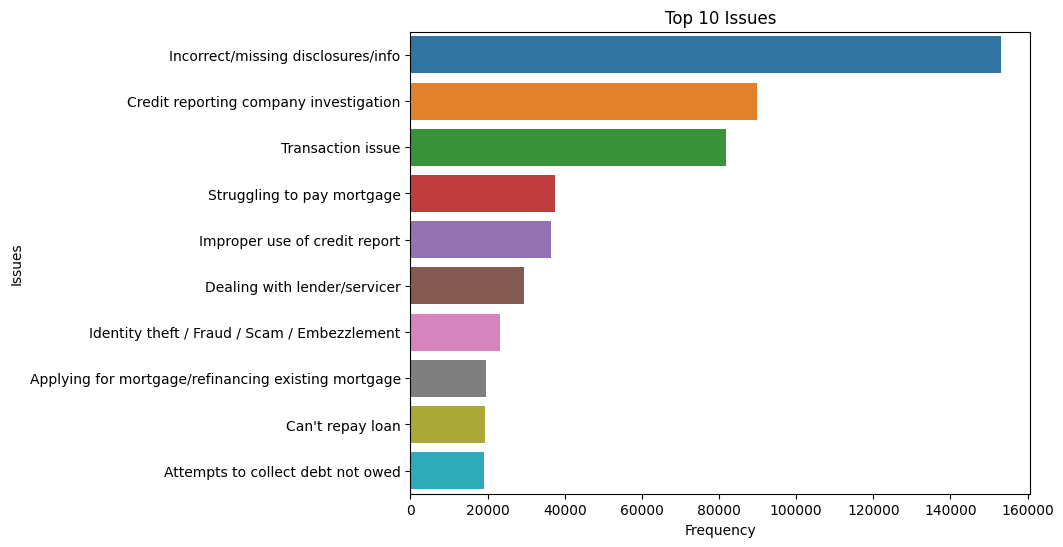

In [85]:
# counting the issues
issue_counts = ddf1['issue'].value_counts().head(10)

# visualizing the top issues
plt.figure(figsize=(8, 6))
sns.barplot(y=issue_counts.index, x=issue_counts.values)
plt.title('Top 10 Issues')
plt.ylabel('Issues')
plt.xlabel('Frequency')
plt.show()

## Most common sub-issues raised by consumers.

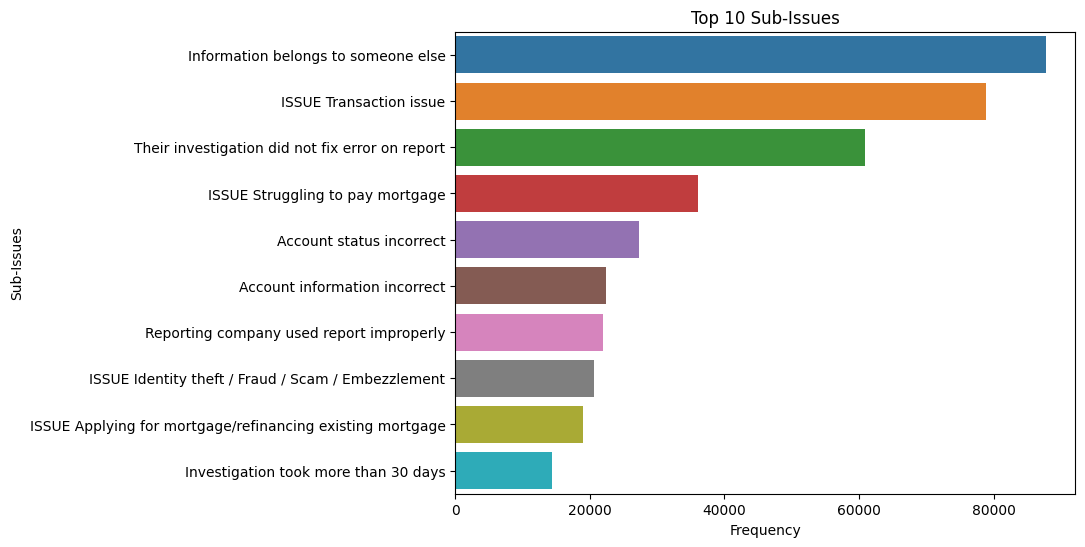

In [86]:
# counting sub-issues
sub_issue_counts = ddf1['sub_issue'].value_counts().head(10)

# visualizing the top sub-issues
plt.figure(figsize=(8, 6))
sns.barplot(y=sub_issue_counts.index, x=sub_issue_counts.values)
plt.title('Top 10 Sub-Issues')
plt.ylabel('Sub-Issues')
plt.xlabel('Frequency')
plt.show()

## Analyze the distribution of complaints over time to identify trends or patterns.


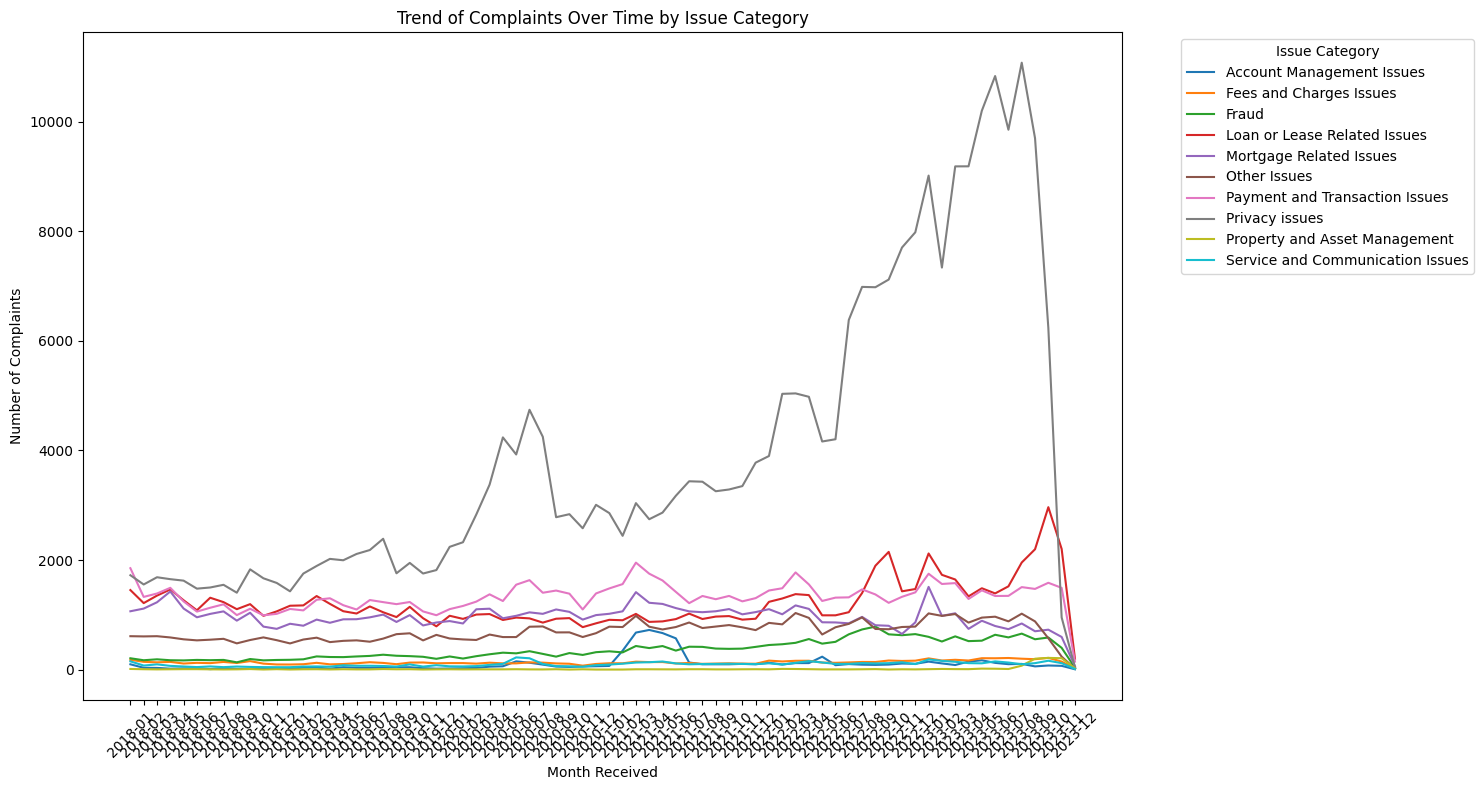

In [87]:
# plotting the distribution of issue categories over time
# convert 'month_received' from period[M] to string
ddf1['month_received_str'] = ddf1['month_received'].astype(str)

# grouping data by 'month_received_str' and 'issue_category'
gd1 = ddf1.groupby(['month_received_str', 'issue_category']).size().reset_index(name='counts')

# creating a lineplot with colors representing different issue categories using Seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(data=gd1, x='month_received_str', y='counts', hue='issue_category',) #palette='viridis')

plt.title('Trend of Complaints Over Time by Issue Category')
plt.ylabel('Number of Complaints')
plt.xlabel('Month Received')
plt.xticks(rotation=45)
plt.legend(title='Issue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [88]:
# creating the same line plot using Plotly Express
fig = px.line(gd1,
              x='month_received_str',
              y='counts',
              color='issue_category',
              title='Trend of Complaints Over Time by Issue Category')

fig.update_layout(
    xaxis_title='Month Received',
    yaxis_title='Number of Complaints',
    legend_title="Issue Category")

fig.show()

The number of complaints grows over time, with the highest numbers occurring in August, October, and November for the most common issue categories. Additionally, there are fluctuations in complaint numbers during various months for different categories. The category with the highest number of issues is 'Privacy Issues'. The category with the lowest number of issues is 'Property and Asset Management Issues' category

In [89]:
# plotting the distribution of issues over time
# grouping data by 'month_received_str' and 'issue_category'
gd2 = ddf1.groupby(['month_received_str', 'issue']).size().reset_index(name='counts')
fig1 = px.line(gd2,
              x='month_received_str',
              y='counts',
              color='issue',
              title='Trend of Complaints Over Time by Issue')

fig1.update_layout(
    xaxis_title='Month Received',
    yaxis_title='Number of Complaints',
    legend_title="Issue")
fig1.show()

Let's determine new issues in 2023.

In [90]:
## NEW ISSUES IN 2023
# convert 'year_received' from Period to Integer
ddf1['year_received_int'] = ddf1['year_received'].dt.year

# issues in 2023
issues_2023 = set(ddf1[ddf1['year_received_int'] == 2023]['issue'].unique())

# issues before 2023
issues_before_2023 = set(ddf1[ddf1['year_received_int'] < 2023]['issue'].unique())

# new issues in 2023
new_issues_2023 = issues_2023 - issues_before_2023

print("New Issues in 2023:", new_issues_2023)

New Issues in 2023: {"Didn't provide services promised", 'Issue with income share agreement', 'Trouble accessing funds in mobile/digital wallet', 'Problems receiving advance', 'Issue where lender is school', 'Unauthorized withdrawals/charges', 'Electronic communications'}


New Issues in 2023:
* 'Trouble accessing funds in mobile/digital wallet',
* 'Electronic communications',
* 'Unauthorized withdrawals/charges',
* 'Problems receiving advance',
* 'Issue with income share agreement',
* 'Issue where lender is school',
* "Didn't provide services promised".

Let's determine new sub-issues in 2023.

In [91]:
## NEW SUB-ISSUES IN 2023
sub_issues_2023 = set(ddf1[ddf1['year_received_int'] == 2023]['sub_issue'].unique())

# sub-issues before 2023
sub_issues_before_2023 = set(ddf1[ddf1['year_received_int'] < 2023]['sub_issue'].unique())

# new sub-issues in 2023
new_sub_issues_2023 = sub_issues_2023 - sub_issues_before_2023

print("New Sub-Issues in 2023:", new_sub_issues_2023)

New Sub-Issues in 2023: {'Account opened without consent/knowledge', 'Bankruptcy', 'Changes in loan terms during application process', 'Trying to communicate with company to fix issue while managing/servicing loan', 'ISSUE Unauthorized withdrawals/charges', 'Company explaining amount owed', 'Issues with financial aid services', 'Problem with forgiveness, cancellation/discharge', 'Loan estimate/other related disclosures', 'Private mortgage insurance (PMI)', 'Confusing/misleading advertising about credit card', 'Fees/costs after closing', 'Paying off loan', 'Lien release', "ISSUE Didn't provide services promised", 'Deficiency balance after repossession', 'Delays in application process', 'Delays with closing process', 'Notice to repossess', 'Changes in loan terms during/after closing', 'Fees/costs during application process', 'Dealing with provider of income share agreement', 'Negative impact of inaccurate appraisal', 'Loan opened without consent/knowledge', 'ISSUE Problems receiving adva

New Sub-Issues in 2023:
* 'Escrow, taxes/insurance',
* 'Bankruptcy',
* 'Loan opened without consent/knowledge',
* 'Fees/costs during application process',
* 'Did not receive car title',
* 'Delays with closing process',
* 'ISSUE Trouble accessing funds in mobile/digital wallet',
* 'Trying to communicate with company to fix issue related to modification, forbearance, short sale, deed-in-lieu, bankruptcy/foreclosure',
* 'Problem with payment plan',
* 'Notice to repossess',
* 'Issues with fees connected to loan',
* 'Company communicating payment assistance/payment extension options',
* 'Account reinstatement/redemption after repossession',
* 'Issues with financial aid services',
* 'Trying to communicate with company to fix issue with loan closing',
* 'Loan estimate/other related disclosures',
* 'An existing modification, forbearance plan, short sale/other loss mitigation relief',
* 'Trying to communicate with company to fix issue while managing/servicing loan',
* 'Deficiency balance after repossession',
* 'Confusing/misleading advertising about credit card',
* 'Company explaining amount owed',
* 'Application denied',
* 'Foreclosure',
* 'Damage caused/loss of personal items in vehicle during actual repossession',
* 'Delays in application process',
* 'Private mortgage insurance (PMI)',
* 'Paying off loan',
* "ISSUE Didn't provide services promised",
* 'ISSUE Unauthorized withdrawals/charges',
* 'Fees/costs after closing',
* 'Trying to communicate with company to fix issue with application process',
* 'ISSUE Problems receiving advance',
* 'Negative impact of inaccurate appraisal',
* 'Lien release',
* 'Account opened without consent/knowledge',
* 'Marketing/disclosure issues',
* 'Problem during payment process',
* 'Voluntary repossession',
* 'Applying for/obtaining modification, forbearance plan, short sale/deed-in-lieu',
* 'Changes in loan terms during/after closing',
* 'Co-signer',
* 'Changes in loan terms during application process',
* 'Setting up escrow account for taxes and insurance',
* 'Cannot graduate, receive diploma/get transcript due to money owed',
* 'Frequent/repeated messages',
* 'Dealing with provider of income share agreement',
* 'Payment issues',
* 'Problem with forgiveness, cancellation/discharge',
* 'Closing disclosure/other related disclosures'.

Let's determine new products in 2023.

In [92]:
## NEW PRODUCTS IN 2023
products_2023 = set(ddf1[ddf1['year_received_int'] == 2023]['product'].unique())

# products before 2023
products_before_2023 = set(ddf1[ddf1['year_received_int'] < 2023]['product'].unique())

# new products in 2023
new_products_2023 = products_2023 - products_before_2023

print("New Products in 2023:", new_products_2023)

New Products in 2023: set()


No new products in 2023.

Let's determine new sub-products in 2023.

In [93]:
## NEW SUB-PRODUCTS IN 2023
sub_products_2023 = set(ddf1[ddf1['year_received_int'] == 2023]['sub_product'].unique())

# sub_products before 2023
sub_products_before_2023 = set(ddf1[ddf1['year_received_int'] < 2023]['sub_product'].unique())

# new sub_products in 2023
new_sub_products_2023 = sub_products_2023 - sub_products_before_2023

print("New Sub-Products in 2023:", new_sub_products_2023)

New Sub-Products in 2023: {'Earned wage access', 'USDA mortgage', 'Rental debt', 'Telecommunications debt', 'Tax refund anticipation loan or check', 'Manufactured home loan', 'Other advances of future income', 'Student loan debt relief'}


New Sub-Products in 2023:
* 'Other advances of future income',
* 'USDA mortgage',
* 'Manufactured home loan',
* 'Earned wage access',
* 'Tax refund anticipation loan or check',
* 'Student loan debt relief',
* 'Rental debt',
* 'Telecommunications debt'.

## Identify regions with higher and lower complaint rates

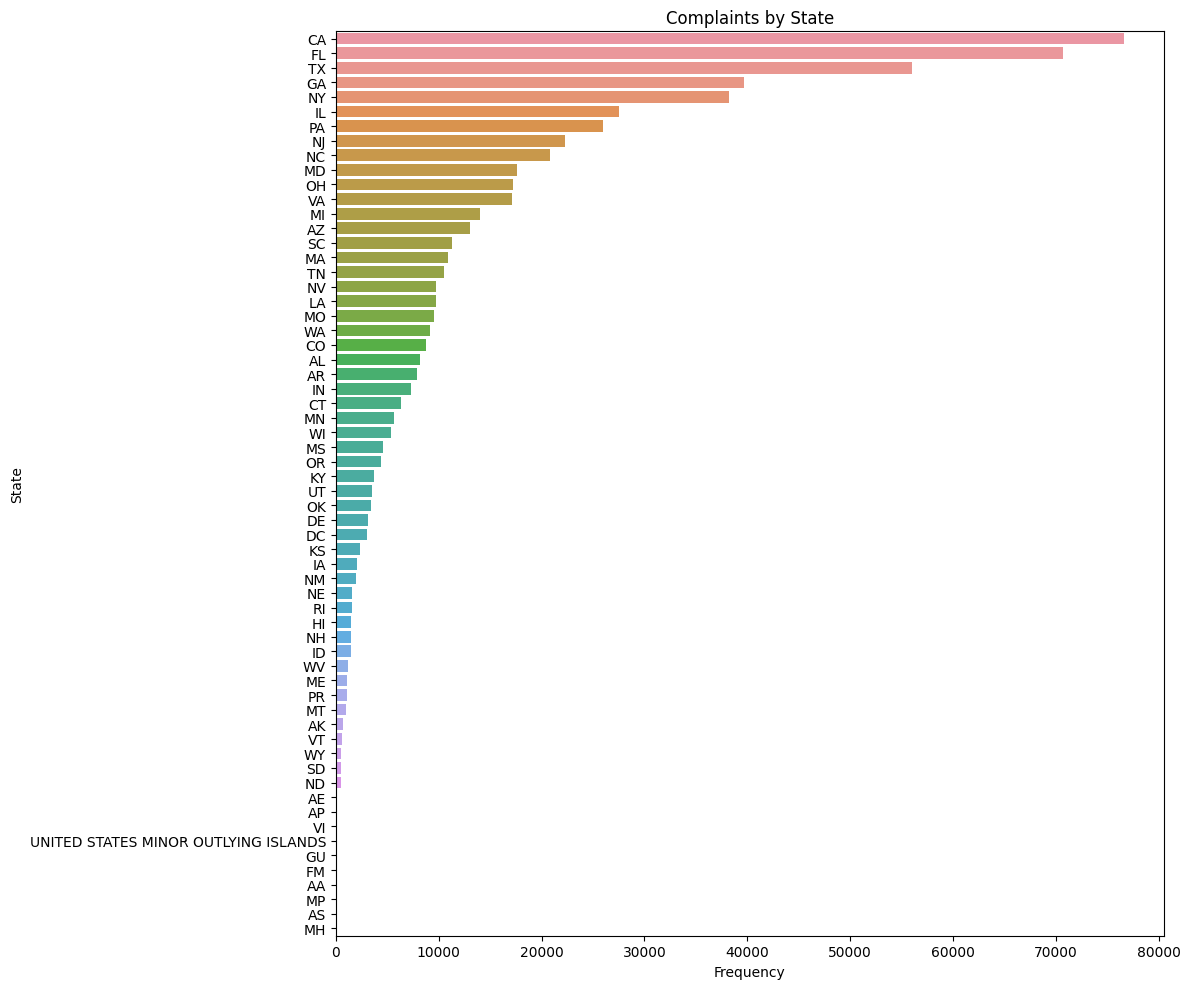

In [94]:
# counting complaints by state
state_complaints = ddf1['state'].value_counts()

# visualizing complaints by state
plt.figure(figsize=(12, 10))
sns.barplot(x=state_complaints.values, y=state_complaints.index)
plt.title('Complaints by State')
plt.ylabel('State')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

California has the highest number of complaints followed by Florida. Next territories have zero complaints:
AE - United States Armed Forces Europe,
AP - United States Armed Forces Pacific,
VI - United States Virgin Islands,
GU - Guam,
FM - Federated States of Micronesia (associated with the U.S. through the Compact of Free Association),
AA - Armed Forces Americas (includes locations in North and South America),
MP - Northern Mariana Islands,
AS - American Samoa,
MH - Marshall Islands (associated with the U.S. through the Compact of Free Association).

## Analyze the distribution of complaints based on product types


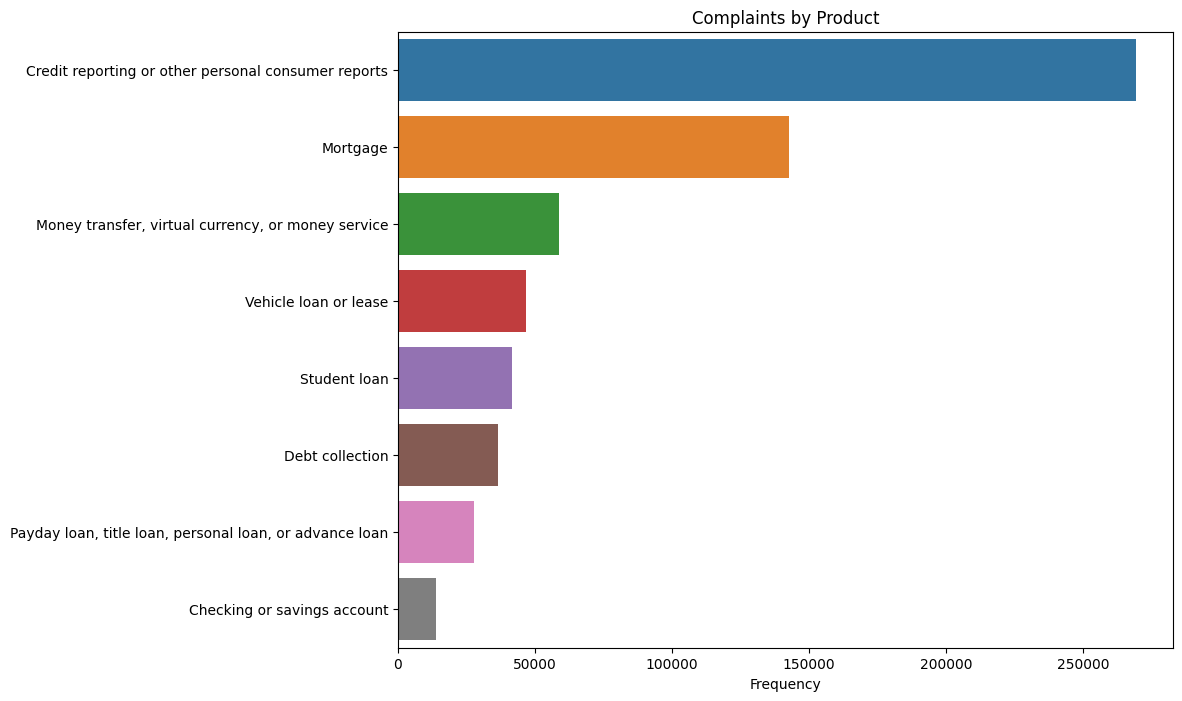

In [95]:
# counting complaints by product
product_counts = ddf1['product'].value_counts()

# visualizing complaints by product
plt.figure(figsize=(10, 8))
sns.barplot(y=product_counts.index, x=product_counts.values)
plt.title('Complaints by Product')
plt.xlabel('Frequency')
plt.show()

## Analyze the distribution of complaints based on sub-products categories

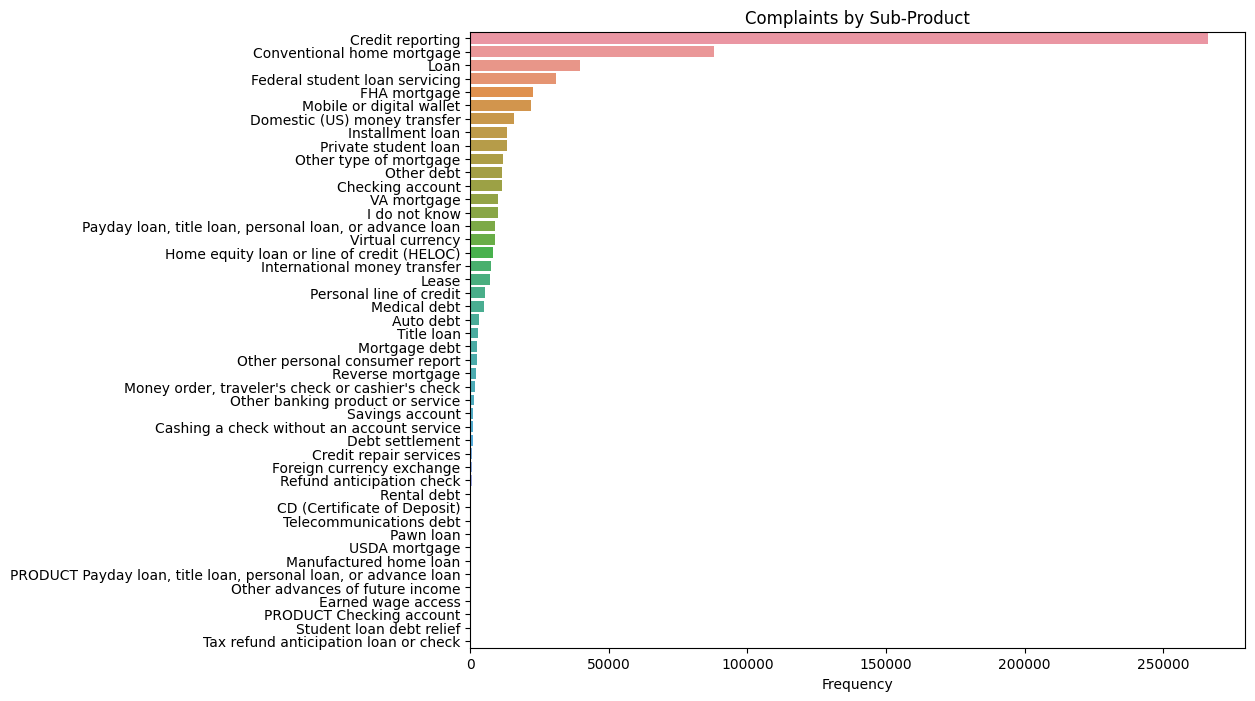

In [96]:
# counting complaints by sub-product
sub_product_counts = ddf1['sub_product'].value_counts()

# visualizing complaints by sub-product
plt.figure(figsize=(10, 8))
sns.barplot(y=sub_product_counts.index, x=sub_product_counts.values)
plt.title('Complaints by Sub-Product')
plt.xlabel('Frequency')
plt.show()

## Compare the performance of different companies in handling and resolving complaints


In [97]:
# identifying top 50 companies with complaints
top_50_companies_complaints = ddf1.company.value_counts().head(50).index
top_50_companies_complaints

Index(['EQUIFAX, INC.', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.',
       'Experian Information Solutions Inc.', 'WELLS FARGO & COMPANY',
       'Paypal Holdings, Inc', 'JPMORGAN CHASE & CO.',
       'BANK OF AMERICA, NATIONAL ASSOCIATION', 'Navient Solutions, LLC.',
       'Mr. Cooper Group Inc.', 'AES/PHEAA', 'Ocwen Financial Corporation',
       'Shellpoint Partners, LLC', 'CAPITAL ONE FINANCIAL CORPORATION',
       'Nelnet, Inc.', 'SELECT PORTFOLIO SERVICING, INC.', 'PNC Bank N.A.',
       'Coinbase, Inc.', 'ALLY FINANCIAL INC.', 'U.S. BANCORP',
       'Santander Consumer USA Holdings Inc.',
       'Specialized Loan Servicing Holdings LLC', 'LoanCare, LLC',
       'Freedom Mortgage Company', 'MOHELA', 'CITIBANK, N.A.',
       'TRUIST FINANCIAL CORPORATION', 'NAVY FEDERAL CREDIT UNION',
       'CITIZENS FINANCIAL GROUP, INC.', 'Rocket Mortgage, LLC',
       'CREDIT ACCEPTANCE CORPORATION', 'TD BANK US HOLDING COMPANY',
       'CARRINGTON MORTGAGE SERVICES, LLC', 'HYUNDAI CAPITAL AMER

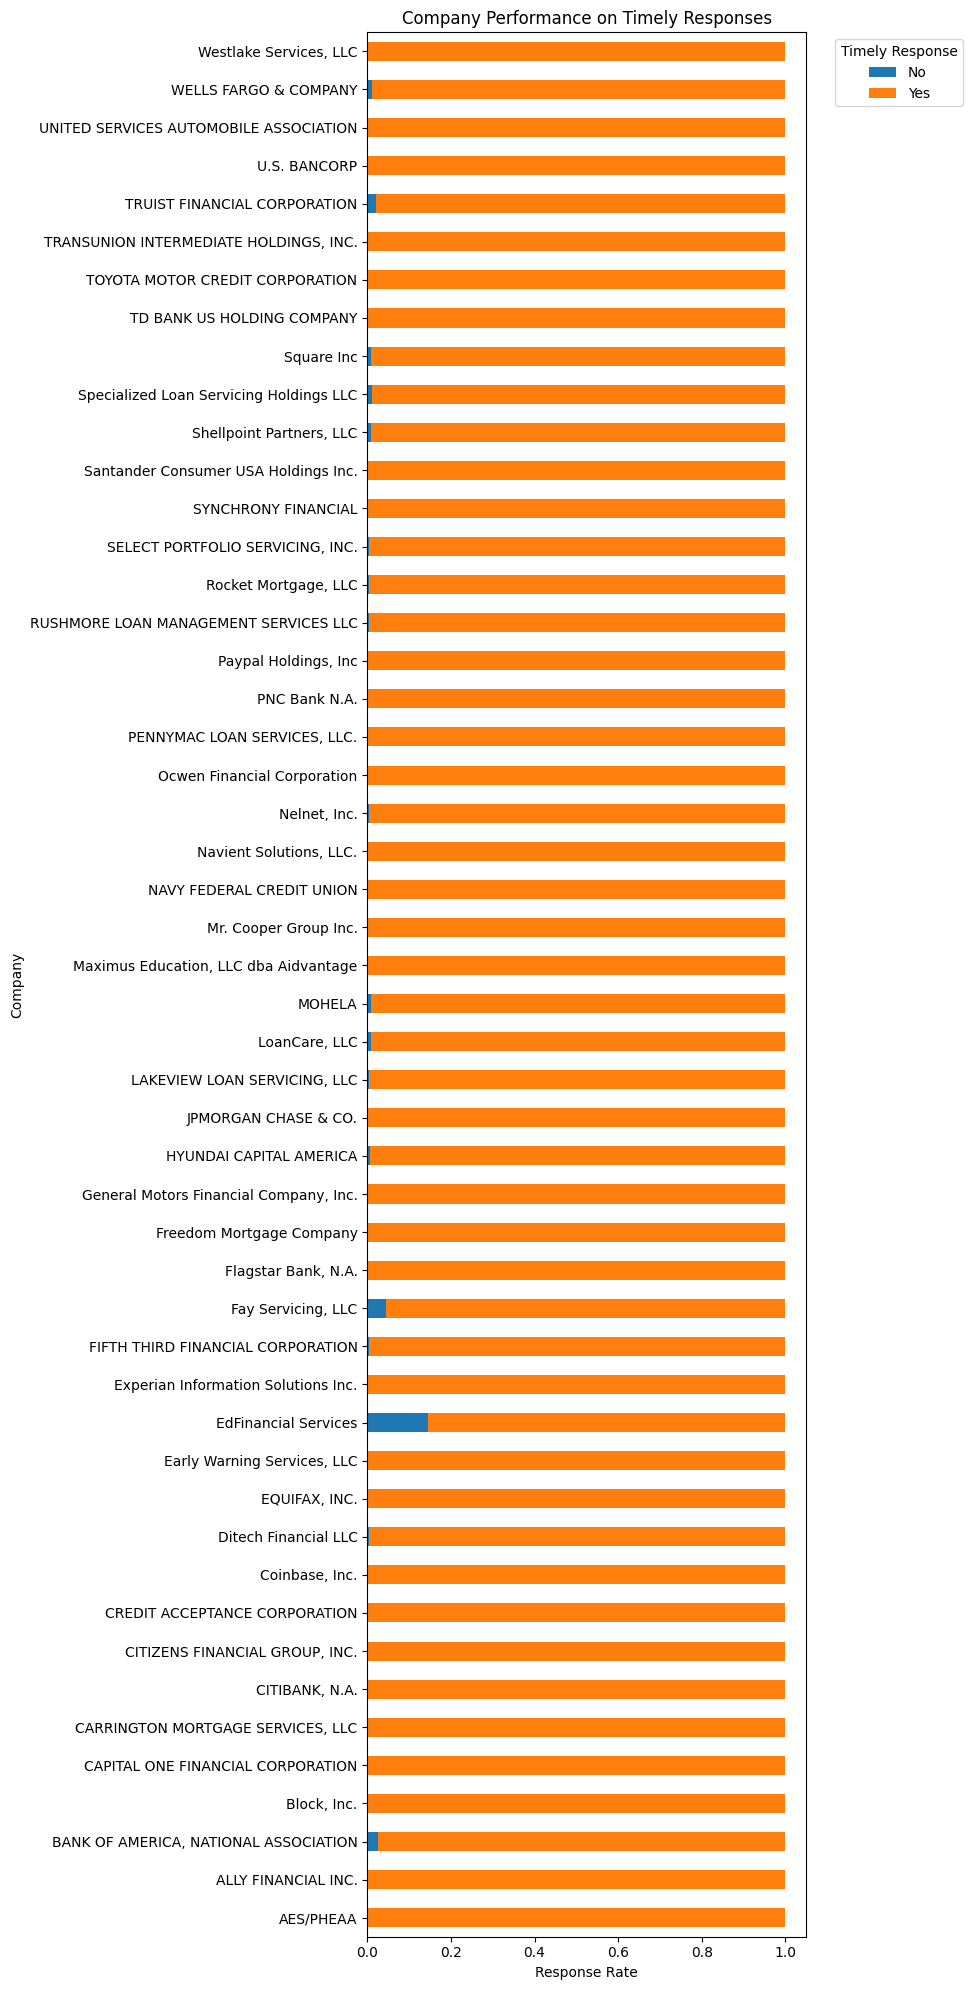

In [98]:
# filtering only  top 50 companies with complaints
ddf1_top50 = ddf1[ddf1['company'].isin(top_50_companies_complaints)]

# aggregating company performance
company_performance = ddf1_top50.groupby('company')['timely_response'].value_counts(normalize=True).unstack()

# visualizing company performance
company_performance.plot(kind='barh', stacked=True, figsize=(10, 20))
plt.title('Company Performance on Timely Responses')
plt.ylabel('Company')
plt.xlabel('Response Rate')
plt.legend(title='Timely Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The companies with the highest number of complaints are often successful in resolving those complaints.

## Identify companies with higher rate of timely manner


In [99]:
# calculating the timely response rate for each company
timely_rate = ddf1.groupby('company')['timely_response'].apply(lambda x: (1-(x == 'No').mean())).sort_values(ascending=False).reset_index()
timely_rate.columns = ['company', 'rate']
timely_rate.head()

,company,rate
0,"Kansas Counselors, Inc.",1.0
1,Mediation Recovery Center,1.0
2,Medical Business Bureau,1.0
3,"Medical Data Systems, Inc.",1.0
4,Medical-Commercial Audit Inc,1.0


In [100]:
# a random sample of 10 rows of the timely response rate for each company
timely_rate.sample(10)

,company,rate
1029,The Rose Law Firm PLLC,1.000000
1917,"Action Financial Services, LLC",1.000000
3300,Revolut Technologies Inc.,0.959184
731,Kikoff Inc.,1.000000
4425,"Prohealth Care, Inc",0.000000
2903,"Focused Recovery Solutions, Inc.",1.000000
2417,"Burns Auto Credit, LLC",1.000000
3298,"Southwest Recovery Services, Inc.",0.959184
3257,NEW CITY FUNDING CORP.,0.967742
247,Old Republic National Title Holding Co.,1.000000


In [101]:
# finding the number of companies with a perfect timely response rate
timely_rate.query('rate == 1.0').nunique()

company    3004
rate          1
dtype: int64

We have 3004 companies with 100% response rate.

In [102]:
# finding the number of companies with a zero timely response rate
timely_rate.query('rate == 0.0').nunique()

company    545
rate         1
dtype: int64

We have 545 companies who doesn't pesponse at all (0% response tate), indicating a potential area for regulatory attention or improvement in customer service practices.

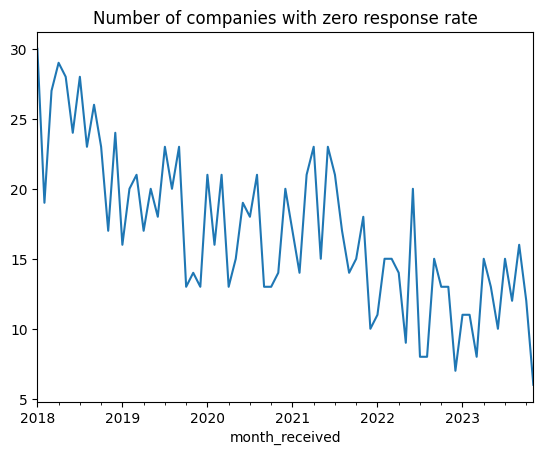

In [103]:
# Let's check if these are new complaints only, or there are older ones, too
bad_cos = timely_rate[timely_rate.rate==0]['company'].unique()
ddf1[ddf1.company.isin(bad_cos)].groupby('month_received')['company'].nunique().plot(title='Number of companies with zero response rate');

Let's check the number of complaints by state and company.

In [104]:
# grouping data by 'state' and 'company' and count the occurrences
state_company_counts = ddf1.groupby(['state', 'company']).size().reset_index(name='complaint_counts')

# sorting the results to see the states with the most complaints for each company
state_company_counts = state_company_counts.sort_values(by='complaint_counts', ascending=False)
state_company_counts.head(20)

,state,company,complaint_counts
6343,FL,"EQUIFAX, INC.",11073
7280,FL,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",10738
6372,FL,Experian Information Solutions Inc.,9623
2793,CA,Experian Information Solutions Inc.,8256
3766,CA,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",8186
2759,CA,"EQUIFAX, INC.",8145
26928,TX,"EQUIFAX, INC.",7870
27880,TX,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",7419
26970,TX,Experian Information Solutions Inc.,6986
7893,GA,"EQUIFAX, INC.",6469


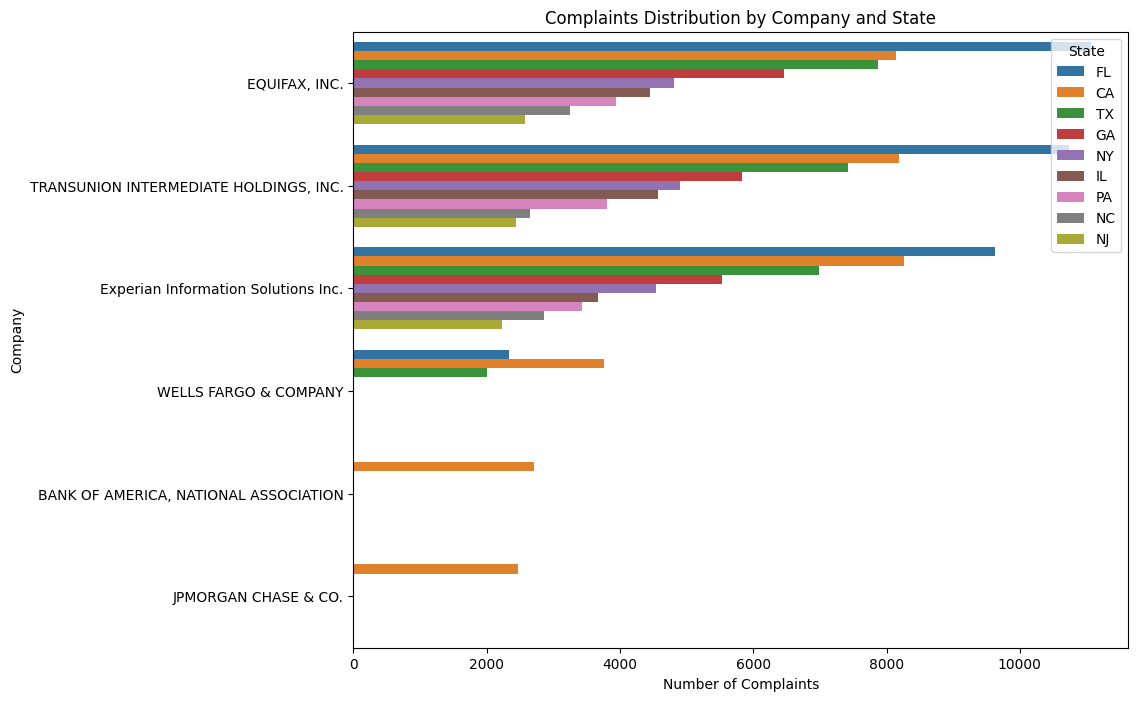

In [105]:
# a bar plot visualizes the top companies with the highest number of complaints across different states
plt.figure(figsize=(10, 8))
sns.barplot(data=state_company_counts.head(32), x='complaint_counts', y='company', hue='state')
plt.title('Complaints Distribution by Company and State')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.legend(title='State')
plt.show()

The head of the list of the companies most complained about is firmly populated by only three (all of them credit reporting companies). They have the most complaints across various states, starting with Florida. This is expected, since the most burning issue in our database is about credit reporting problems. The next three companies are banks and they have most complaints in California.

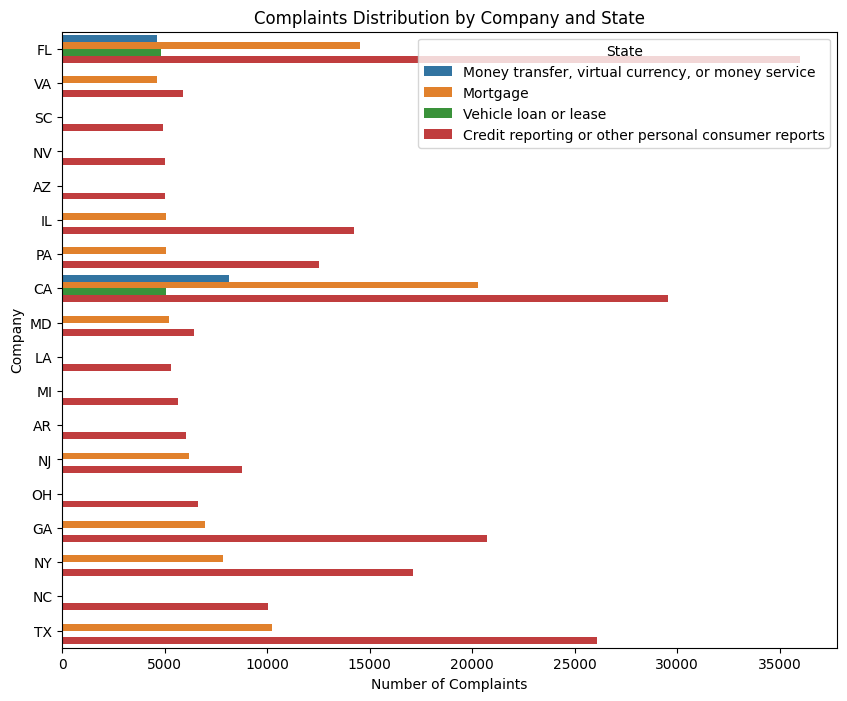

In [106]:
# a bar plot visualizes the top companies with the highest number of complaints across different states
plt.figure(figsize=(10, 8))
sns.barplot(data=ddf1.groupby(['state','product'])['complaint_id'].count().reset_index().sort_values(by='complaint_id').tail(32), x='complaint_id', y='state', hue='product')
plt.title('Complaints Distribution by Company and State')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.legend(title='State')
plt.show()

In [107]:
# the top 10 complaint issues for the company 'WELLS FARGO & COMPANY'
ddf1[ddf1.company=='WELLS FARGO & COMPANY']['issue'].value_counts().sort_values(ascending=False).head(10)

Transaction issue                                      5852
Struggling to pay mortgage                             4689
Identity theft / Fraud / Scam / Embezzlement           2316
Applying for mortgage/refinancing existing mortgage    2003
Managing loan/lease                                    1369
Incorrect/missing disclosures/info                     1317
Managing account                                       1128
Closing on mortgage                                     907
Can't repay loan                                        858
Credit reporting company investigation                  758
Name: issue, dtype: int64

The fourth most complained company, Wells Fargo, has mostly transaction and mortgage issues. This gives us a hint - credit reporting problems (the issues with 'credit report' or 'disclosure') should be concentrated in those three heading companies as well:

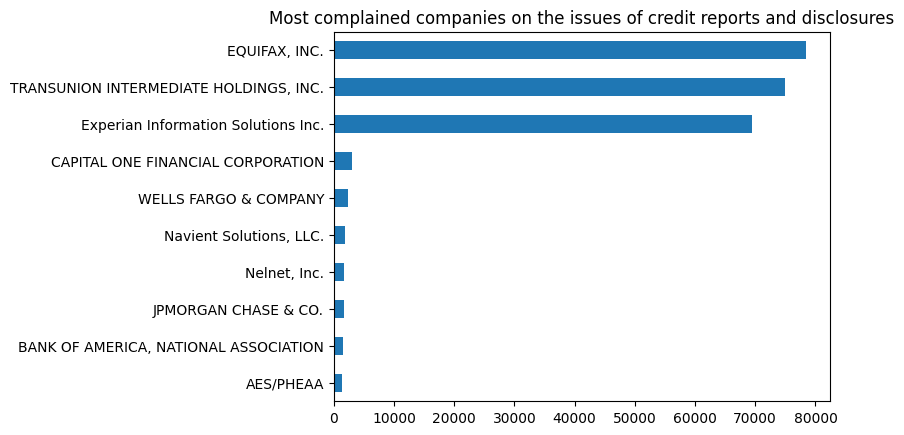

In [108]:
# a bar plot showing the top 10 companies with the most complaints related to credit reports and disclosures
ddf1[ddf1.issue.str.contains("redit report|disclosure")]['company'].value_counts().sort_values().tail(10).plot.barh(title=
                                                            "Most complained companies on the issues of credit reports and disclosures");

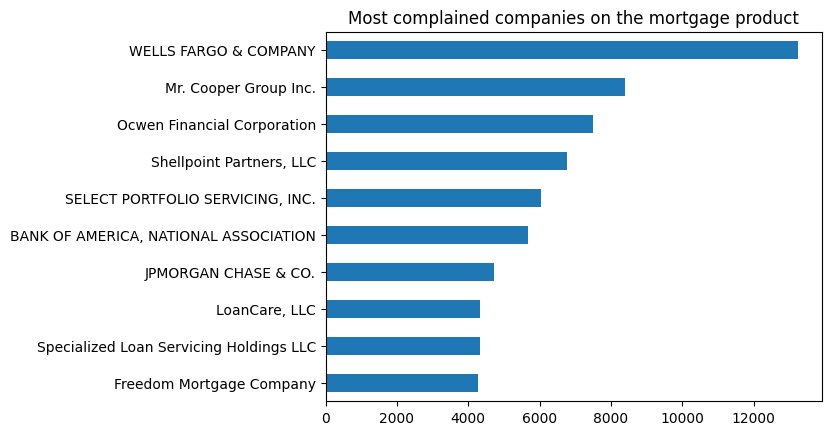

In [109]:
# a bar plot showing the top 10 companies with the most complaints related to the mortgage product
ddf1[ddf1['product'].str.contains("ortgage")]['company'].value_counts().sort_values().tail(10).plot.barh(title=
                                                                              "Most complained companies on the mortgage product");

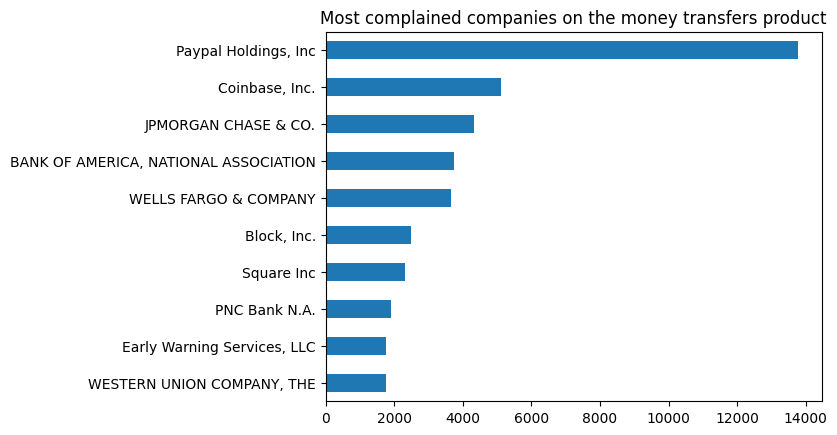

In [110]:
# a bar plot showing the top 10 companies with the most complaints related to the money transfers product
ddf1[ddf1['product'].str.contains("transfer")]['company'].value_counts().sort_values().tail(10).plot.barh(title=
                                                                            "Most complained companies on the money transfers product");

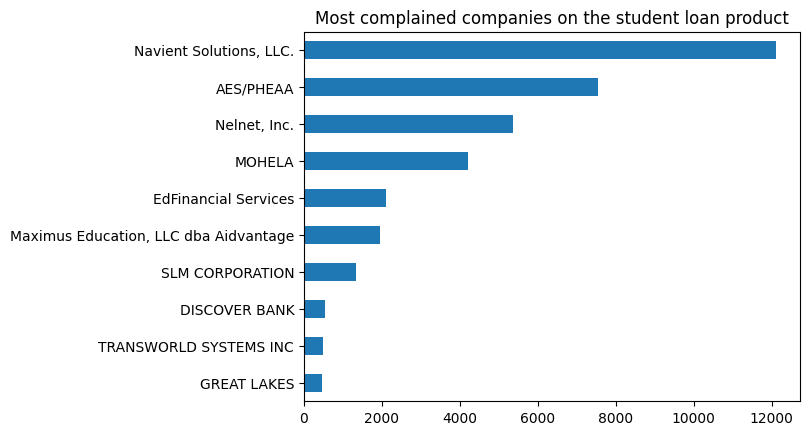

In [111]:
# a bar plot showing the top 10 companies with the most complaints related to the student loan product
ddf1[ddf1['product'].str.contains("tudent")]['company'].value_counts().sort_values().tail(10).plot.barh(title=
                                                                                  "Most complained companies on the student loan product");

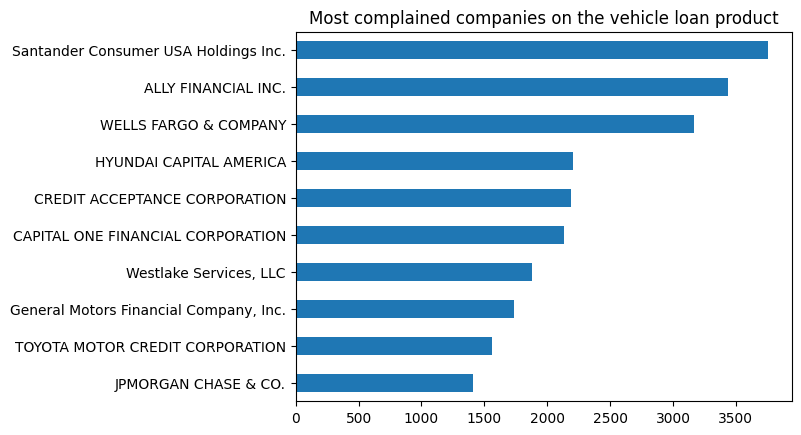

In [112]:
# a bar plot showing the top 10 companies with the most complaints related to the vehicle loan product
ddf1[ddf1['product'].str.contains("ehicle")]['company'].value_counts().sort_values().tail(10).plot.barh(title=
                                                                              "Most complained companies on the vehicle loan product");

Let's analyze complaints by companies and states.

In [113]:
# top 15 states with the most complaints
top15_states = state_complaints.head(15).index.tolist()

# top 30 companies with the most complaints
top30_companies = ddf1['company'].value_counts().head(30).index.tolist()

# only data from the top states and companies
ddf1_top_states = ddf1[ddf1['state'].isin(top15_states) & ddf1['company'].isin(top30_companies)]
ddf1_top_states.head(1)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,product_category,month_received,year_received,issue_category,month_received_str,year_received_int
3,2023-10-11,Student loan,Federal student loan servicing,Dealing with lender/servicer,Need information about loan balance/loan terms,For MOHELA- I was proactive and applied for ID...,Company believes it acted appropriately as aut...,MOHELA,AZ,85042,...,Closed with explanation,Yes,NaN,7685487,loans,2023-10,2023,Loan or Lease Related Issues,2023-10,2023


In [114]:
# a pivot table to analyze complaints by company and state for the top 30 companies and top 15 states
pivot_top_states = ddf1_top_states.pivot_table(values='complaint_id', index='company', columns='state', aggfunc='count').sort_values(by="FL",
                                                                                                                                     ascending=False).sort_values(
                                                                                                                                         by="EQUIFAX, INC.",
                                                                                                                                         axis=1,
                                                                                                                                         ascending=False
                                                                                                                                     )

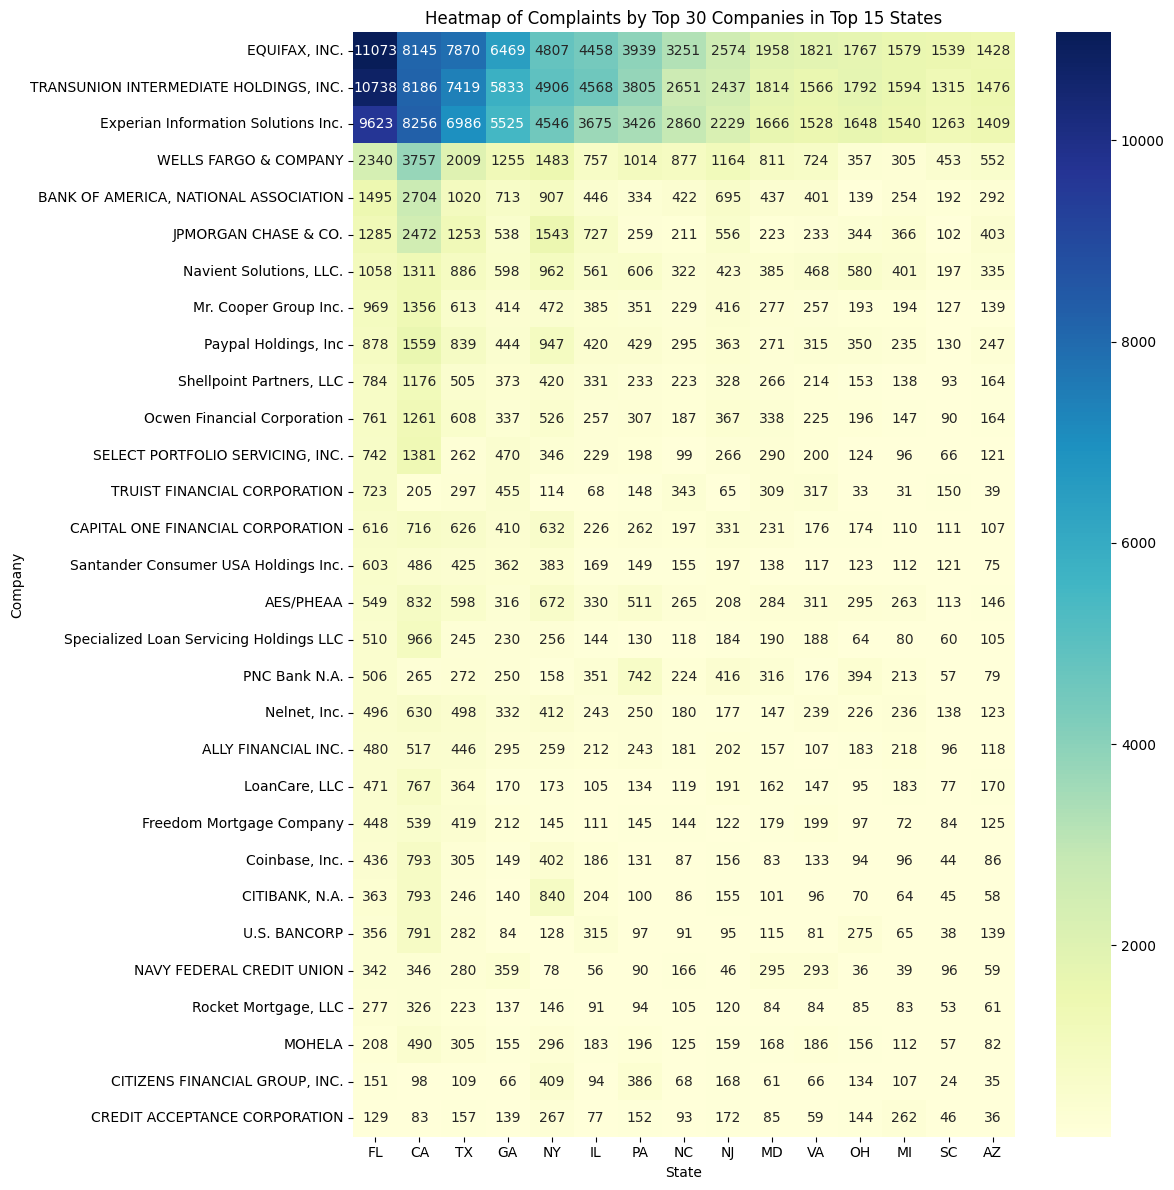

In [115]:
#  a heatmap to visualize complaints by the top 30 companies in the top 15 states
plt.figure(figsize=(12, 12))
sns.heatmap(pivot_top_states,
            cmap="YlGnBu",
            annot=True,
            fmt='d',
            vmin=100,
            vmax=pivot_top_states.max().max())
plt.title('Heatmap of Complaints by Top 30 Companies in Top 15 States')
plt.xlabel('State')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


EQUIFAX, INC. has the highest number of complaints, followed by TRANSUNION INTERMEDIATE HOLDINGS, INC. and Experian Information Solutions Inc. These companies consistently receive significantly more complaints than any other companies.

Florida, California, Texas, Georgia, and New York are the states with the highest number of complaints.

## Examine the status of complaints and closure reasons like how many complaints have been closed, and what is the most common closure reason among 'closed,' 'closed with explanation,' 'closed with monetary relief,' and 'closed with non-monetary relief.


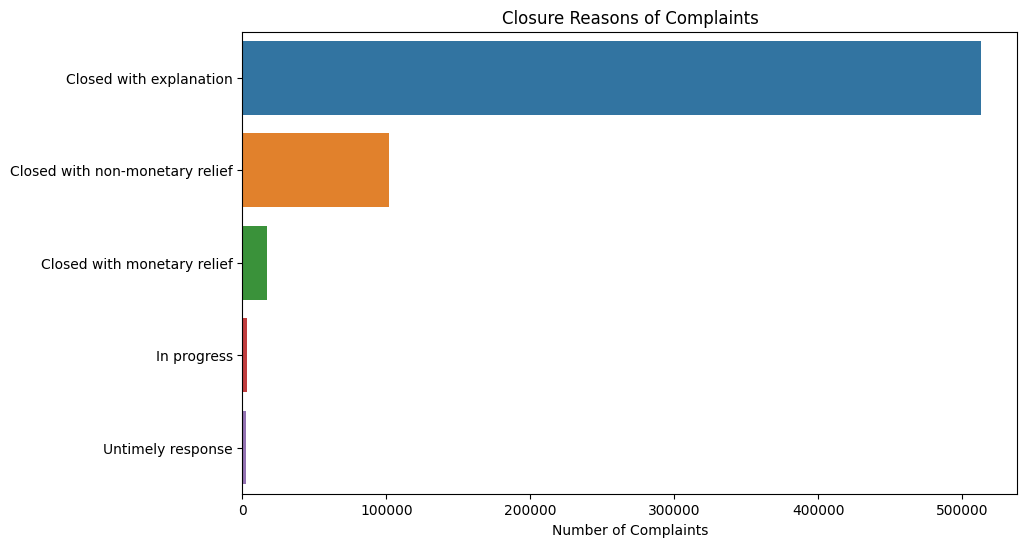

In [116]:
# counting different closure reasons
closure_reasons = ddf1['company_response_to_consumer'].value_counts()

# visualizing closure reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=closure_reasons.values, y=closure_reasons.index)
plt.title('Closure Reasons of Complaints')
plt.xlabel('Number of Complaints')
plt.show()

## Specific types of complaints & certain states.

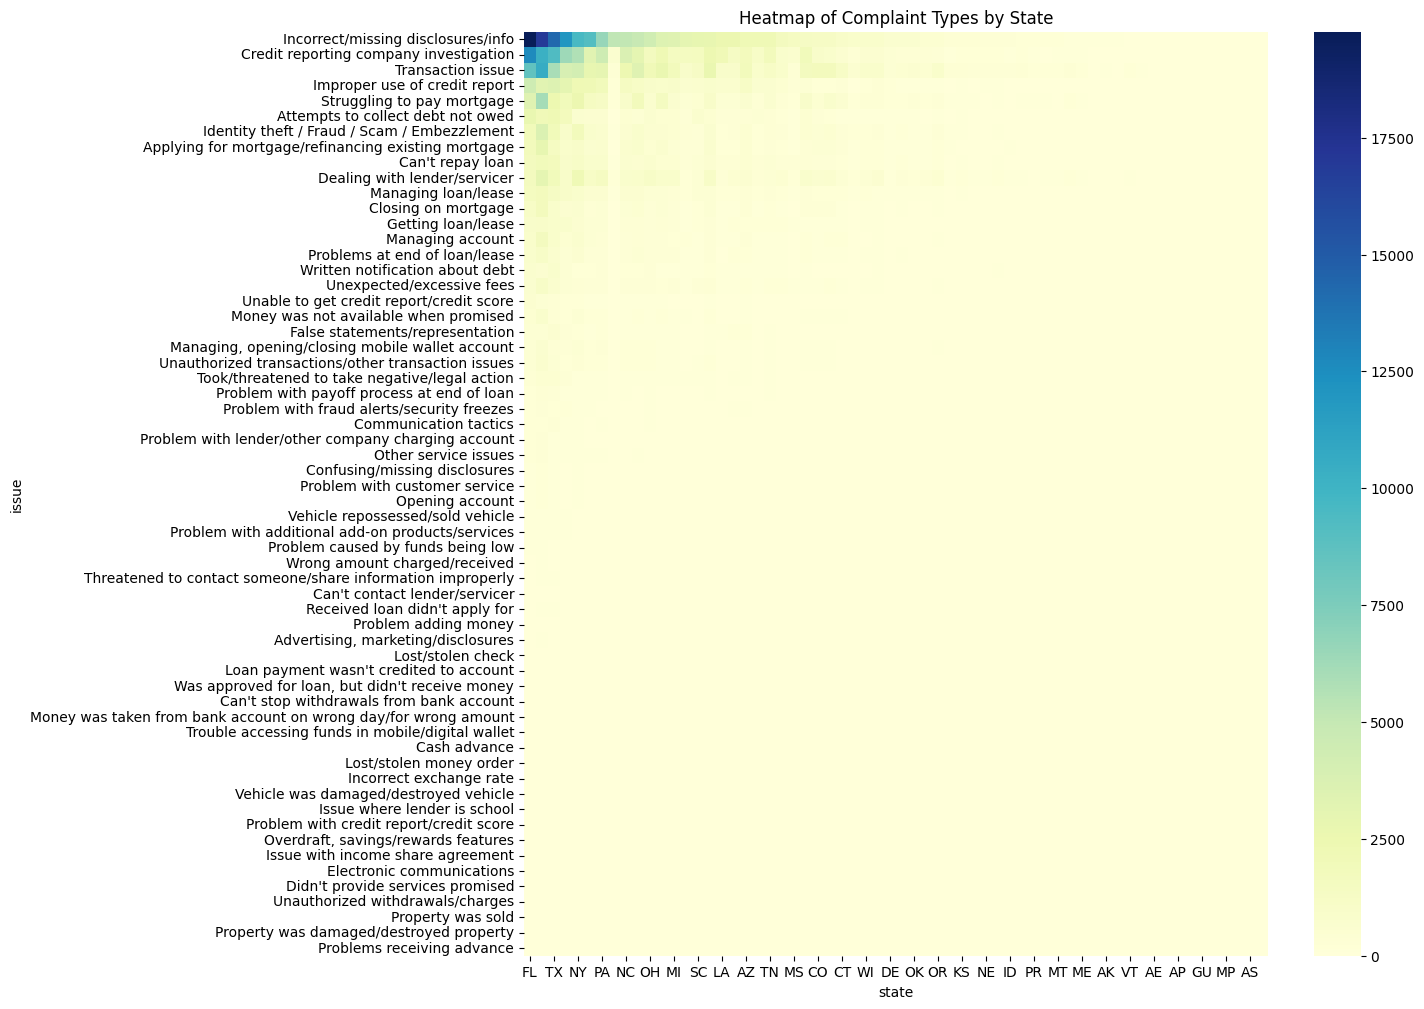

In [117]:
# creating a pivot table for issues by state
state_issue = pd.pivot_table(ddf1, values='complaint_id', index='issue', columns='state', aggfunc=np.size, fill_value=0).sort_values(by="FL",
                                                                                                                                     ascending=False).sort_values(
                                                                                                                                         by="Incorrect/missing disclosures/info",
                                                                                                                                         axis=1,
                                                                                                                                         ascending=False
                                                                                                                                     )

# visualizing the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(state_issue, cmap="YlGnBu")
plt.title('Heatmap of Complaint Types by State')
plt.show()

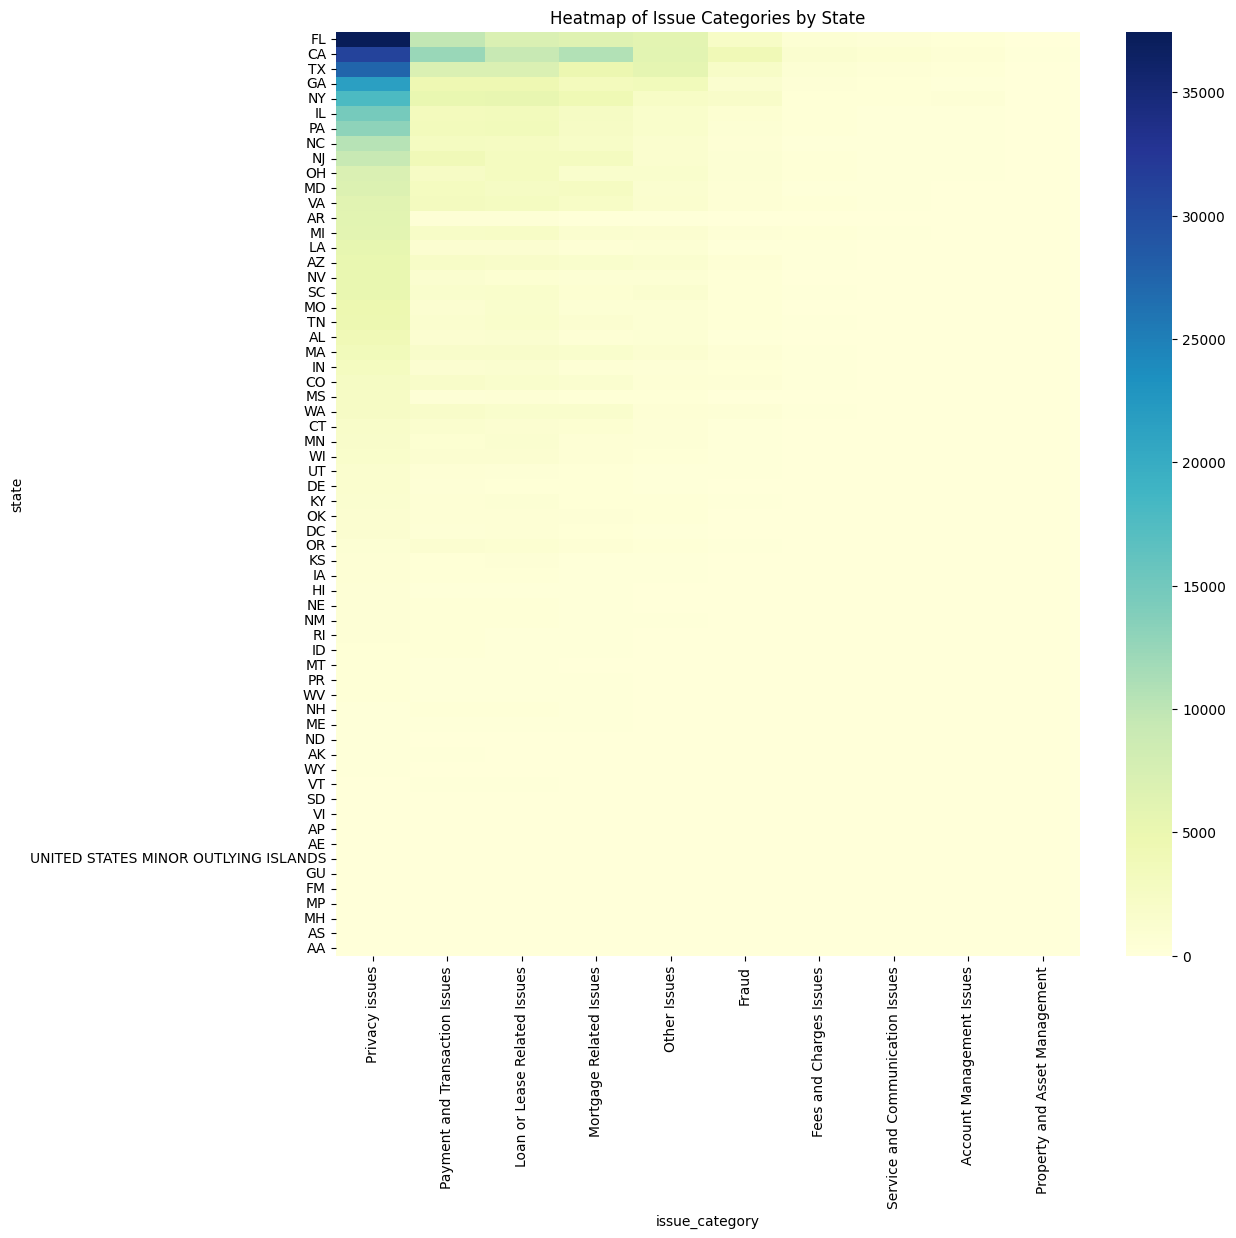

In [118]:
# creating a pivot table for issue categorie by state
state_issue_category = pd.pivot_table(ddf1, values='complaint_id', index='state', columns='issue_category', aggfunc=np.size, fill_value=0).sort_values(by="Privacy issues",
                                                                                                                                    ascending=False).sort_values(
                                                                                                                                    by="FL",
                                                                                                                                    axis=1,
                                                                                                                                    ascending=False
                                                                                                                                    )

# visualizing the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(state_issue_category, cmap="YlGnBu")
plt.title('Heatmap of Issue Categories by State')
plt.show()

## Analyzing combination of ISSUE CATEGORY, ISSUE, and SUB-ISSUE.

In [119]:
# counting the number of each unique combination of issue categories, issues, and sub-issues.
issue_combinations = ddf1.groupby(['issue_category', 'issue', 'sub_issue']).size().reset_index(name='counts')

# sort by counts to find the most common combinations
issue_combinations = issue_combinations.sort_values(by='counts', ascending=False)

print(issue_combinations.head(10))

                     issue_category  \
175                  Privacy issues   
154  Payment and Transaction Issues   
167                  Privacy issues   
90          Mortgage Related Issues   
174                  Privacy issues   
173                  Privacy issues   
172                  Privacy issues   
8                             Fraud   
76          Mortgage Related Issues   
165                  Privacy issues   

                                                 issue  \
175                 Incorrect/missing disclosures/info   
154                                  Transaction issue   
167             Credit reporting company investigation   
90                          Struggling to pay mortgage   
174                 Incorrect/missing disclosures/info   
173                 Incorrect/missing disclosures/info   
172                      Improper use of credit report   
8         Identity theft / Fraud / Scam / Embezzlement   
76   Applying for mortgage/refinancing existing 

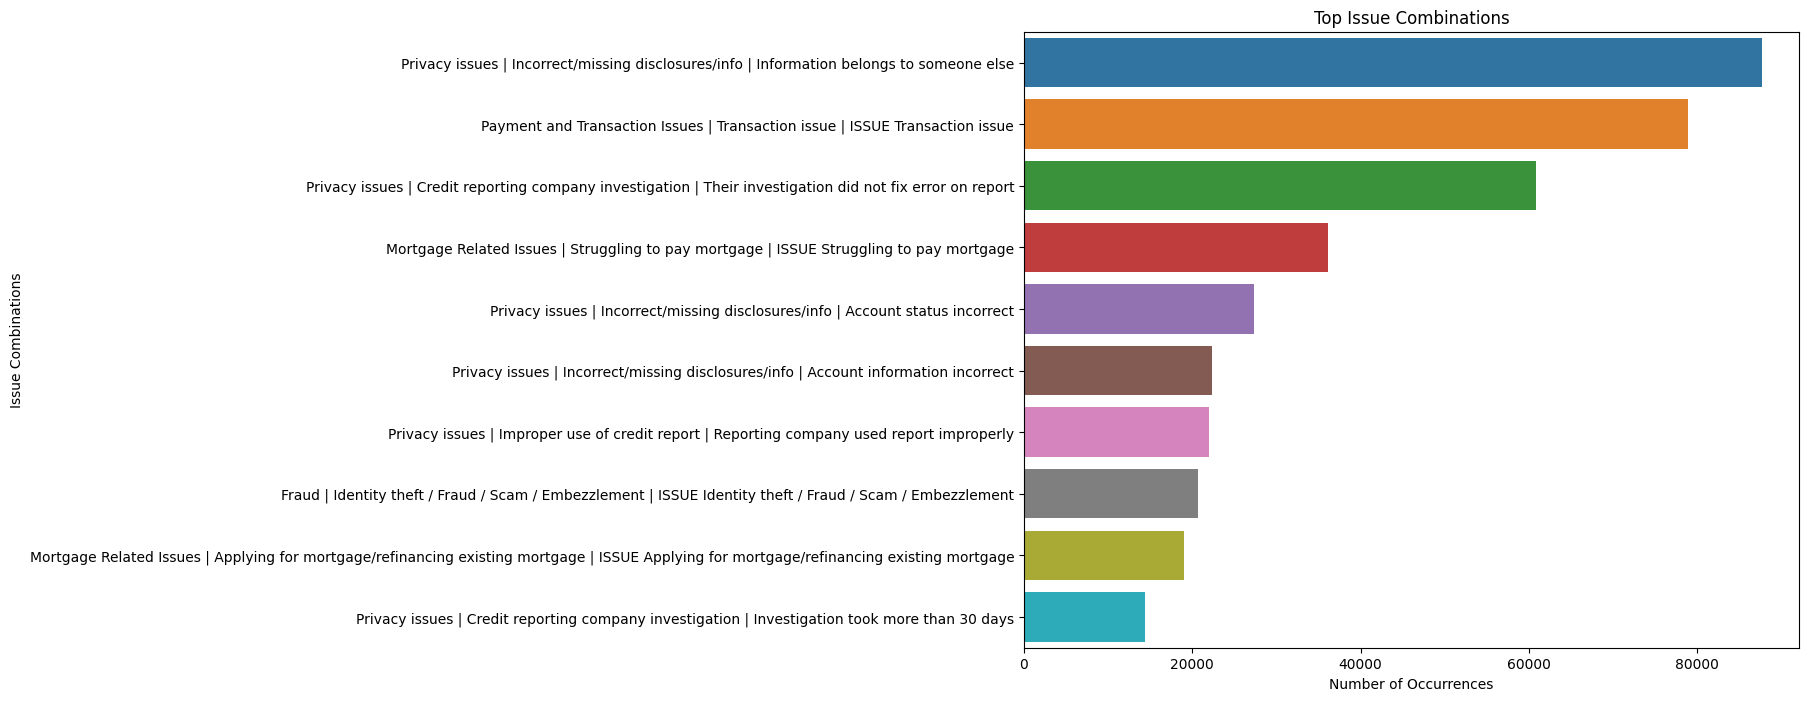

In [120]:
# concatenating the three levels into a single string for each combination
issue_combinations['combined'] = issue_combinations['issue_category'] + " | " + issue_combinations['issue'] + " | " + issue_combinations['sub_issue']

# visualizing top combinations using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=issue_combinations.head(10), x='counts', y='combined')
plt.title('Top Issue Combinations')
plt.xlabel('Number of Occurrences')
plt.ylabel('Issue Combinations')
plt.show()

In [121]:
# a hierarchical view of the issue combinations
fig = px.treemap(
    issue_combinations,
    path=['issue_category', 'issue', 'sub_issue'],
    values='counts',
    title='Hierarchical Representation of Issue Categories, Issues, and Sub-Issues',
    width=1000,
    height=1100)

fig.show()

In [122]:
# calculating the percentage of complaints submitted via the Web channel
print ('Web channel provides for', "{:.1%}".format(ddf1[ddf1.submitted_via=="Web"].shape[0] / ddf1.shape[0]), 'complaints in total')
# a pivot table counting complaints by issue and submission method
pd.pivot_table(ddf1,index='issue',columns='submitted_via', values='complaint_id', aggfunc='count')


Web channel provides for 90.7% complaints in total


submitted_via,Email,Fax,Phone,Postal mail,Referral,Web,Web Referral
issue,,,,,,,
"Advertising, marketing/disclosures",NaN,NaN,50.0,12.0,10.0,597.0,1.0
Applying for mortgage/refinancing existing mortgage,1.0,53.0,2266.0,393.0,2252.0,14666.0,12.0
Attempts to collect debt not owed,NaN,NaN,NaN,NaN,NaN,19014.0,NaN
Can't contact lender/servicer,NaN,1.0,69.0,4.0,11.0,585.0,NaN
Can't repay loan,NaN,111.0,1237.0,286.0,1045.0,16734.0,44.0
Can't stop withdrawals from bank account,NaN,NaN,19.0,1.0,4.0,427.0,NaN
Cash advance,NaN,1.0,14.0,NaN,15.0,134.0,NaN
Closing on mortgage,NaN,20.0,1047.0,99.0,675.0,10362.0,5.0
Communication tactics,NaN,NaN,NaN,NaN,NaN,2197.0,NaN


# Cells for reverting to old names and saving in csv files:

In [124]:
ddf1.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id',
       'product_category', 'month_received', 'year_received', 'issue_category',
       'month_received_str', 'year_received_int'],
      dtype='object')

In [123]:

def write_all():
  old_c = list(old_column_names)
  old_c.extend(['Product category', 'Month received', 'Year received', 'Issue category', 'Month received str', 'Year received str'])

  ddf1.columns = old_c

  ddf1.to_csv('2018-2023_complaints_cleaned_1.csv', index=False)
  return

#write_all()
